In this part, you are going to implement a two-layer fully connected autoencoder on MNIST handwritten digits dataset without any deep learning libraries, using numpy only.

Important notes:

- Variables are named in this assignmend regarding following conventions:

     - Constants are named with uppercase words separated with underscores. eg. `INPUT_SIZE`, `LEARNING_RATE`.

     - Derivative of variables are named as variable name with `D_` prefix. For example, `D_x` indicates $\frac{\partial x}{\partial loss}$

     - Output of a layer n before activation function is denoted as `hn`. For example, output of first layer before activation is denoted as `h1`. 

     - Similarly, output of a layer n after activation function is denoted as `on`. For example, output of first layer after activation is denoted as `o1`. 


- The parts you need to fill in are marked with `##FILL HERE` comments. You should only change the lines marked with this comment. Also, you should not change the variable names in the marked lines.

- Try to use 'vectorized' code, that is, avoid for loops as much as possible and use vector and matrix operations instead. Not only performance of your code will be much higher, but also conforming to vectorized mindset makes everything easier for you when dealing with data science/machine learning problems.

- Recommended watch before starting the assignment, https://www.youtube.com/watch?v=lFOOjeH2wsY

# 1) Boilerplate, imports, data loading

In [2]:
from test_utils import load_dataset, test_relu, test_sigmoid, test_mean_squared_error, test_sigmoid_backward, test_weights
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load_dataset function; 
# - takes training set of MNIST dataset from torch datasets,
# - flattens 28x28 images to 784 dimensional vectors


X = load_dataset() / 255


# - You need to scale dataset between 0 and 1 after loading the dataset
X  /= 255

1.0%

100.0%


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



100.0%


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw



6.0%

100.0%


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



100.0%


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



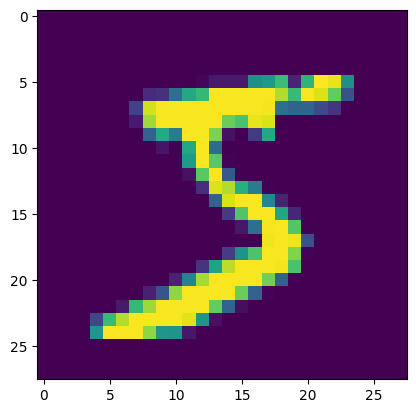

In [3]:
#visualize 1 sample
plt.imshow(X[0].reshape(28,28))
plt.show()

In [4]:
X.mean()

0.0005123940246033064

# 2) Initialize Weights



Randomly initialize layer 1 and layer 2 weights as 2D numpy arrays with zero mean and 0.01 standard deviation. For simplicity, biases are omitted.

In [5]:
INPUT_SIZE  = X.shape[1]
HIDDEN_SIZE = 64

w1 = np.random.normal(0, 0.01, (INPUT_SIZE, HIDDEN_SIZE))
w2 = np.random.normal(0, 0.01, (HIDDEN_SIZE, INPUT_SIZE))


# 3) Define activation functions 

In this part, we will define the necessary function in numpy. Note that all functions need to operate on batches, not single instances. As a convention, first dimension of all tensors will be the batch dimension. 

Define relu and sigmoid activation functions in forward mode.

In [6]:
def relu(x):
    return np.maximum(0, x)

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 4.a) Define activation functions in 'backward mode'
Suppose you know the derivative of a function's output with respect to the loss, which is $\frac{\partial loss}{\partial f(x)}$. Backward mode of a function takes $\frac{\partial loss}{\partial f(x)}$ (```D_output``` argument) and gives derivatives of its input with respect to the loss $\frac{\partial loss}{\partial x}$. 

Backward mode of relu is defined below. Using this as an example, sigmoid activation function in backward mode. You are going to use these functions to implement backpropagation. 



In [9]:
#Note: If you are confused about D_output means, read the notes at the top of the page.
def relu_backward(D_output, output):
    '''
    relu_backward: Backward mode of relu activation function
    
    Arguments;
    D_output: Derivative of output of relu with respect to loss.
    output  : Output of relu activation function
    
    Returns;
    Derivative of input of relu function with respect to loss.
    '''
    D_input = D_output * (output > 0)
    return D_input

In [8]:
def sigmoid_backward(D_output, output):    
    '''
    sigmoid_backward: Backward mode of sigmoid activation function
    
    Arguments;
    D_output: Derivative of output of sigmoid with respect to loss.
    output  : Output of sigmoid activation function
    
    Returns;
    Derivative of input of sigmoid function with respect to loss.
    '''
    return D_output * output * (1 - output)

# 4.b) Define loss function


Define the function computing mean squared error metric, given outputs and targets.

In [10]:
def mean_squared_error(outputs, targets):
    squared_errors = (outputs - targets) ** 2
    return np.mean(squared_errors)


# 5) Sanity Check
Since Part 6 will be a little more difficult than the other parts, make sure everything is correct so far using test scripts before proceeding Part 6,(just run the cell below). If anything is incorrect with your implementations, do not start implementing part 6 before fixing the mistakes and making sure everything works as intended.

Note: Don't forget to run cells after making changes in them or you may re-test your old implementations unintentionally.

In [11]:
test_weights(w1, w2, INPUT_SIZE, HIDDEN_SIZE)
test_relu(relu)
test_sigmoid(sigmoid)
test_sigmoid_backward(sigmoid_backward)
test_mean_squared_error(mean_squared_error)

Weights are initialized properly.
'relu' is implemented properly.
'sigmoid' is implemented properly.
'sigmoid_backward' is implemented properly.
'mean_squared_error' is implemented properly.


# 6) Training

Set hyperparameters

In [12]:
BATCH_SIZE = 1024
NUM_EPOCHS = 10
LEARNING_RATE = 0.0001

Calculate how many iterations will be done per epoch.

Hint: You may want to use `//` operator, which does integer division in Python 3.

In [13]:
NUM_TRAINING_INSTANCES = X.shape[0]

In [14]:
ITERATIONS_PER_EPOCH = NUM_TRAINING_INSTANCES // BATCH_SIZE

Training loop mainly consists of 4 steps

1) Sample batch from dataset

2) Forward propagation

3) Backpropagation

4) Parameter updates

1st and 4th steps are implemented. You are expected to implement forward propagation and backpropagation using the functions you defined above. 

- You can use ```@``` operator or ```np.dot``` function for matrix multiplication.
- Note that you have implemented every backward operation needed, except matrix multiplication. Find out what is the backward mode of matrix multiplication operation. Or derive it, if you feel adventurous.

Epoch 1, Iteration 0 -- Loss: 0.249500


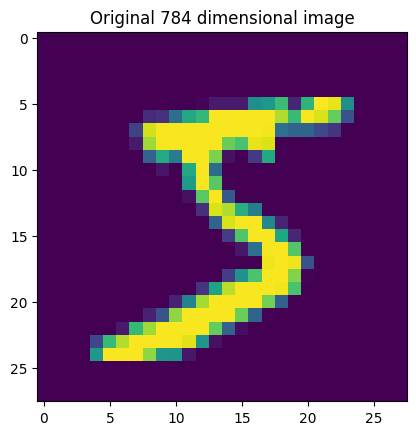

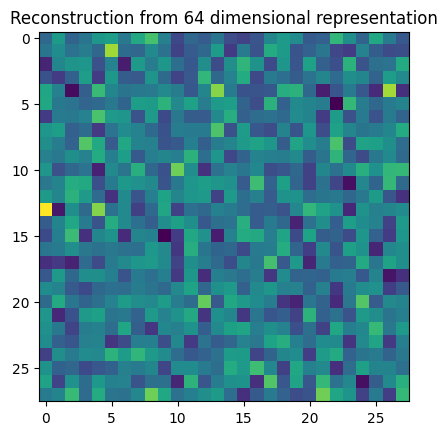

Epoch 1, Iteration 1 -- Loss: 0.249480
Epoch 1, Iteration 2 -- Loss: 0.249486
Epoch 1, Iteration 3 -- Loss: 0.249507
Epoch 1, Iteration 4 -- Loss: 0.249480
Epoch 1, Iteration 5 -- Loss: 0.249450
Epoch 1, Iteration 6 -- Loss: 0.249496
Epoch 1, Iteration 7 -- Loss: 0.249513
Epoch 1, Iteration 8 -- Loss: 0.249473
Epoch 1, Iteration 9 -- Loss: 0.249485
Epoch 1, Iteration 10 -- Loss: 0.249456


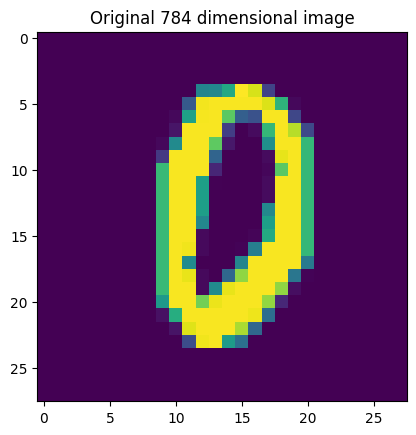

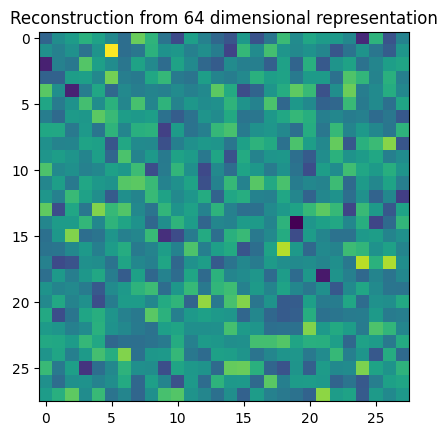

Epoch 1, Iteration 11 -- Loss: 0.249485
Epoch 1, Iteration 12 -- Loss: 0.249456
Epoch 1, Iteration 13 -- Loss: 0.249467
Epoch 1, Iteration 14 -- Loss: 0.249511
Epoch 1, Iteration 15 -- Loss: 0.249497
Epoch 1, Iteration 16 -- Loss: 0.249500
Epoch 1, Iteration 17 -- Loss: 0.249521
Epoch 1, Iteration 18 -- Loss: 0.249492
Epoch 1, Iteration 19 -- Loss: 0.249458
Epoch 1, Iteration 20 -- Loss: 0.249484


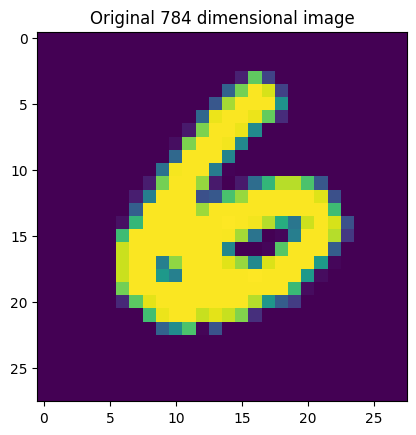

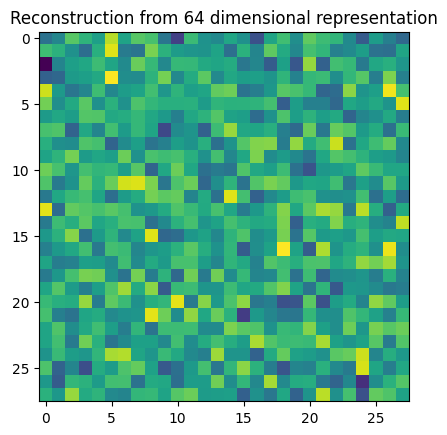

Epoch 1, Iteration 21 -- Loss: 0.249480
Epoch 1, Iteration 22 -- Loss: 0.249449
Epoch 1, Iteration 23 -- Loss: 0.249495
Epoch 1, Iteration 24 -- Loss: 0.249478
Epoch 1, Iteration 25 -- Loss: 0.249523
Epoch 1, Iteration 26 -- Loss: 0.249483
Epoch 1, Iteration 27 -- Loss: 0.249462
Epoch 1, Iteration 28 -- Loss: 0.249477
Epoch 1, Iteration 29 -- Loss: 0.249525
Epoch 1, Iteration 30 -- Loss: 0.249530


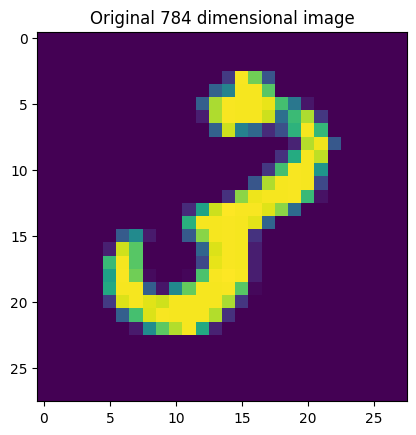

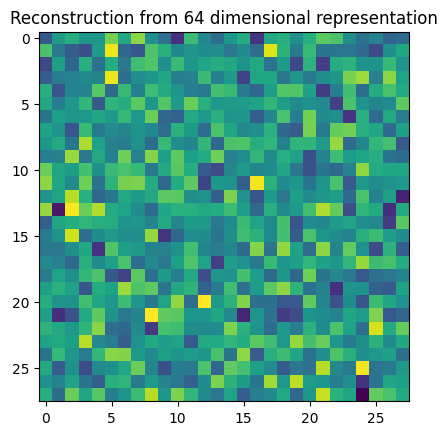

Epoch 1, Iteration 31 -- Loss: 0.249487
Epoch 1, Iteration 32 -- Loss: 0.249498
Epoch 1, Iteration 33 -- Loss: 0.249485
Epoch 1, Iteration 34 -- Loss: 0.249490
Epoch 1, Iteration 35 -- Loss: 0.249462
Epoch 1, Iteration 36 -- Loss: 0.249473
Epoch 1, Iteration 37 -- Loss: 0.249495
Epoch 1, Iteration 38 -- Loss: 0.249485
Epoch 1, Iteration 39 -- Loss: 0.249489
Epoch 1, Iteration 40 -- Loss: 0.249510


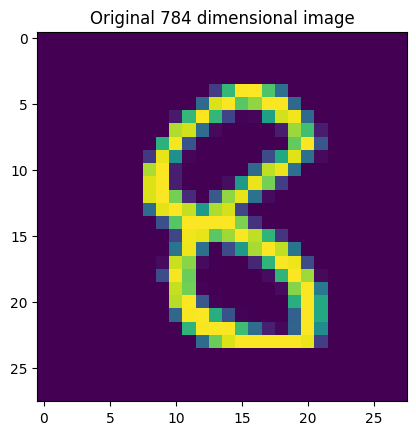

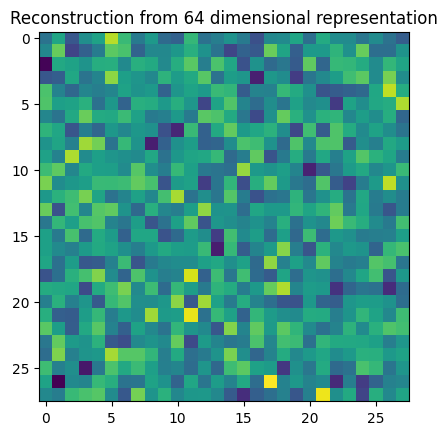

Epoch 1, Iteration 41 -- Loss: 0.249472
Epoch 1, Iteration 42 -- Loss: 0.249501
Epoch 1, Iteration 43 -- Loss: 0.249503
Epoch 1, Iteration 44 -- Loss: 0.249513
Epoch 1, Iteration 45 -- Loss: 0.249491
Epoch 1, Iteration 46 -- Loss: 0.249472
Epoch 1, Iteration 47 -- Loss: 0.249466
Epoch 1, Iteration 48 -- Loss: 0.249501
Epoch 1, Iteration 49 -- Loss: 0.249495
Epoch 1, Iteration 50 -- Loss: 0.249498


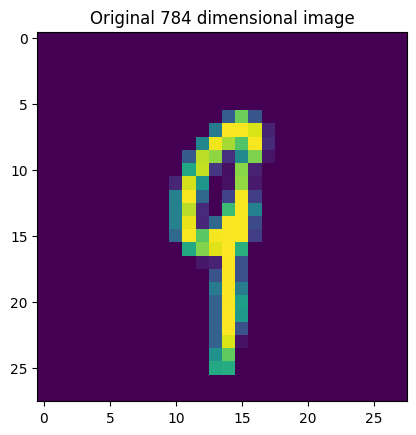

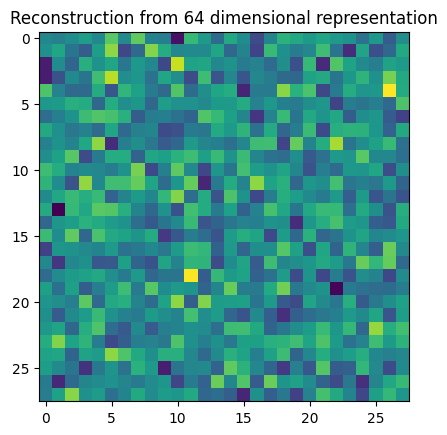

Epoch 1, Iteration 51 -- Loss: 0.249493
Epoch 1, Iteration 52 -- Loss: 0.249513
Epoch 1, Iteration 53 -- Loss: 0.249478
Epoch 1, Iteration 54 -- Loss: 0.249472
Epoch 1, Iteration 55 -- Loss: 0.249508
Epoch 1, Iteration 56 -- Loss: 0.249514
Epoch 1, Iteration 57 -- Loss: 0.249492
Epoch 2, Iteration 58 -- Loss: 0.249498


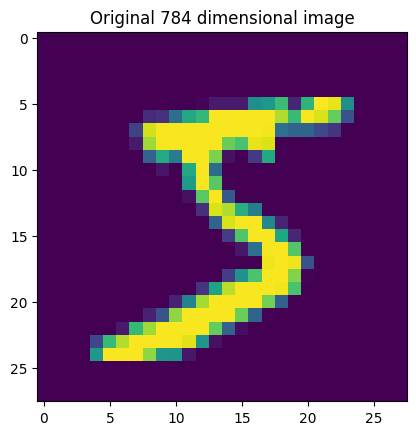

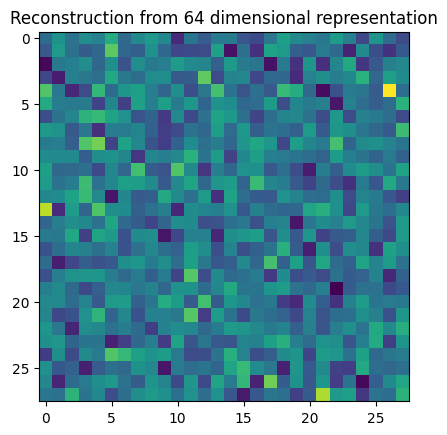

Epoch 2, Iteration 59 -- Loss: 0.249477
Epoch 2, Iteration 60 -- Loss: 0.249484
Epoch 2, Iteration 61 -- Loss: 0.249504
Epoch 2, Iteration 62 -- Loss: 0.249477
Epoch 2, Iteration 63 -- Loss: 0.249447
Epoch 2, Iteration 64 -- Loss: 0.249493
Epoch 2, Iteration 65 -- Loss: 0.249510
Epoch 2, Iteration 66 -- Loss: 0.249470
Epoch 2, Iteration 67 -- Loss: 0.249482
Epoch 2, Iteration 68 -- Loss: 0.249453


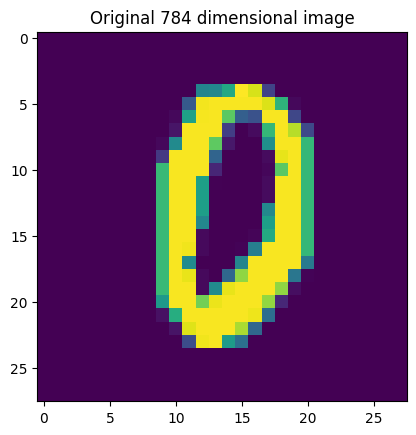

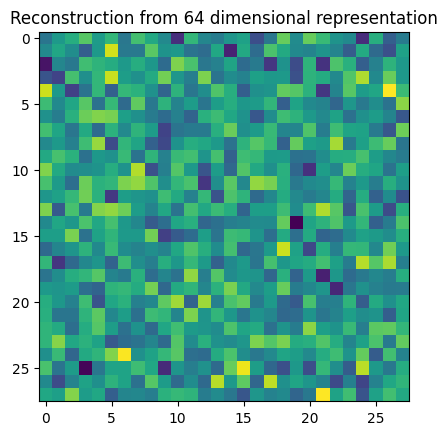

Epoch 2, Iteration 69 -- Loss: 0.249482
Epoch 2, Iteration 70 -- Loss: 0.249453
Epoch 2, Iteration 71 -- Loss: 0.249464
Epoch 2, Iteration 72 -- Loss: 0.249508
Epoch 2, Iteration 73 -- Loss: 0.249494
Epoch 2, Iteration 74 -- Loss: 0.249496
Epoch 2, Iteration 75 -- Loss: 0.249517
Epoch 2, Iteration 76 -- Loss: 0.249488
Epoch 2, Iteration 77 -- Loss: 0.249454
Epoch 2, Iteration 78 -- Loss: 0.249480


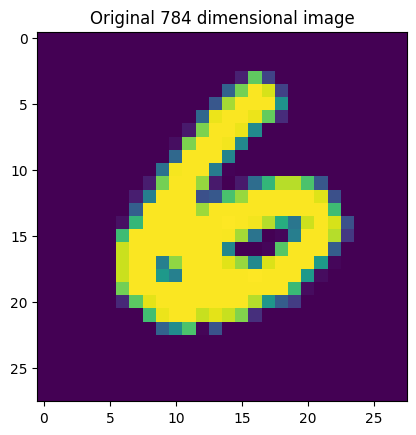

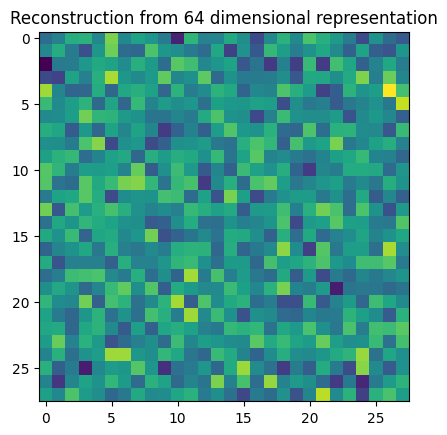

Epoch 2, Iteration 79 -- Loss: 0.249476
Epoch 2, Iteration 80 -- Loss: 0.249444
Epoch 2, Iteration 81 -- Loss: 0.249491
Epoch 2, Iteration 82 -- Loss: 0.249473
Epoch 2, Iteration 83 -- Loss: 0.249518
Epoch 2, Iteration 84 -- Loss: 0.249478
Epoch 2, Iteration 85 -- Loss: 0.249457
Epoch 2, Iteration 86 -- Loss: 0.249472
Epoch 2, Iteration 87 -- Loss: 0.249520
Epoch 2, Iteration 88 -- Loss: 0.249526


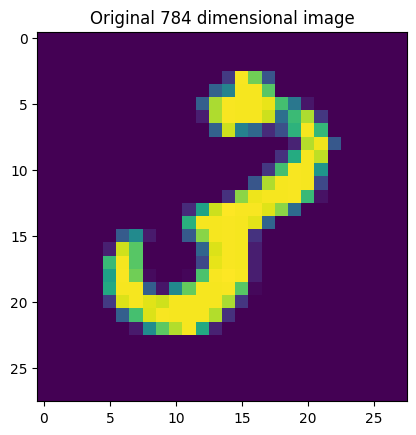

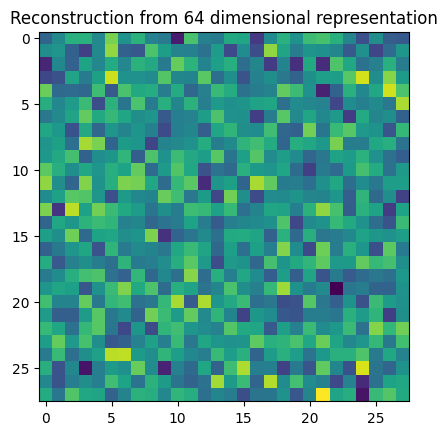

Epoch 2, Iteration 89 -- Loss: 0.249481
Epoch 2, Iteration 90 -- Loss: 0.249493
Epoch 2, Iteration 91 -- Loss: 0.249480
Epoch 2, Iteration 92 -- Loss: 0.249484
Epoch 2, Iteration 93 -- Loss: 0.249456
Epoch 2, Iteration 94 -- Loss: 0.249467
Epoch 2, Iteration 95 -- Loss: 0.249489
Epoch 2, Iteration 96 -- Loss: 0.249478
Epoch 2, Iteration 97 -- Loss: 0.249482
Epoch 2, Iteration 98 -- Loss: 0.249503


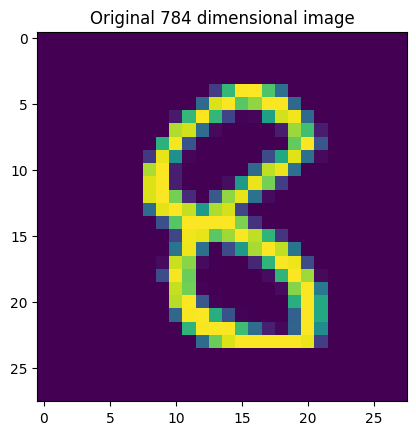

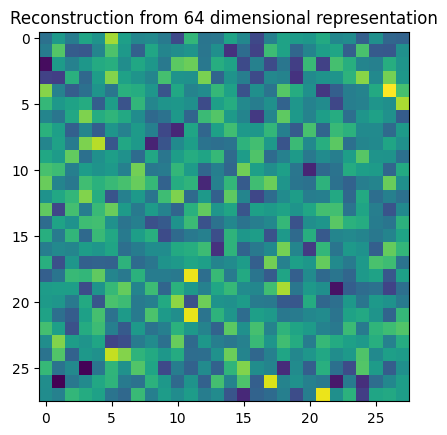

Epoch 2, Iteration 99 -- Loss: 0.249464
Epoch 2, Iteration 100 -- Loss: 0.249494
Epoch 2, Iteration 101 -- Loss: 0.249496
Epoch 2, Iteration 102 -- Loss: 0.249505
Epoch 2, Iteration 103 -- Loss: 0.249483
Epoch 2, Iteration 104 -- Loss: 0.249463
Epoch 2, Iteration 105 -- Loss: 0.249457
Epoch 2, Iteration 106 -- Loss: 0.249492
Epoch 2, Iteration 107 -- Loss: 0.249485
Epoch 2, Iteration 108 -- Loss: 0.249488


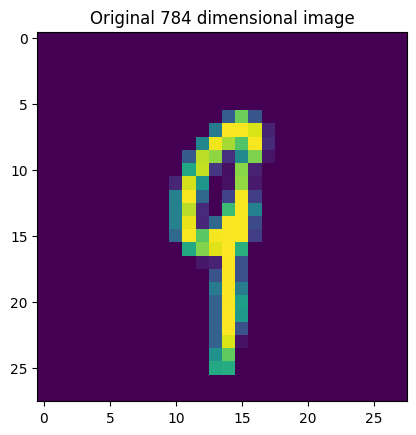

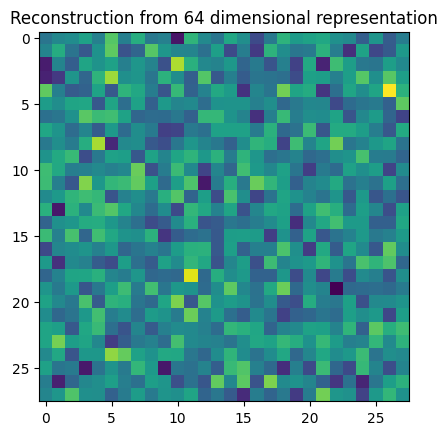

Epoch 2, Iteration 109 -- Loss: 0.249483
Epoch 2, Iteration 110 -- Loss: 0.249503
Epoch 2, Iteration 111 -- Loss: 0.249467
Epoch 2, Iteration 112 -- Loss: 0.249460
Epoch 2, Iteration 113 -- Loss: 0.249496
Epoch 2, Iteration 114 -- Loss: 0.249503
Epoch 2, Iteration 115 -- Loss: 0.249480
Epoch 3, Iteration 116 -- Loss: 0.249485


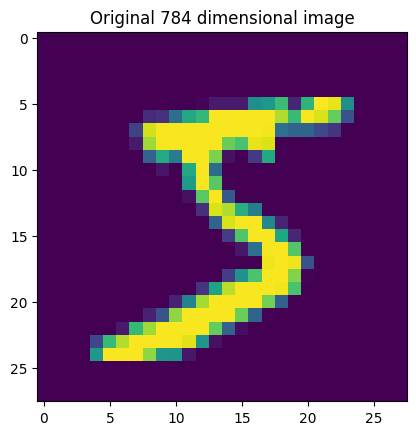

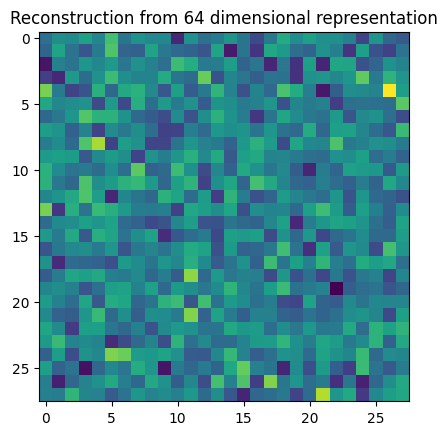

Epoch 3, Iteration 117 -- Loss: 0.249463
Epoch 3, Iteration 118 -- Loss: 0.249470
Epoch 3, Iteration 119 -- Loss: 0.249491
Epoch 3, Iteration 120 -- Loss: 0.249462
Epoch 3, Iteration 121 -- Loss: 0.249431
Epoch 3, Iteration 122 -- Loss: 0.249477
Epoch 3, Iteration 123 -- Loss: 0.249495
Epoch 3, Iteration 124 -- Loss: 0.249453
Epoch 3, Iteration 125 -- Loss: 0.249464
Epoch 3, Iteration 126 -- Loss: 0.249434


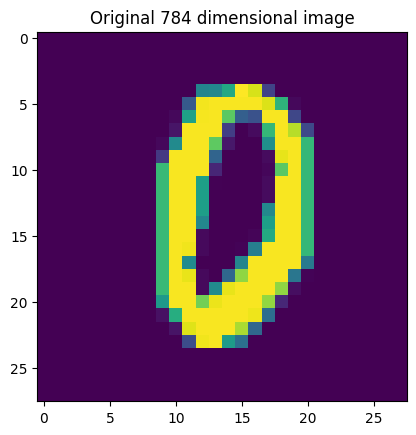

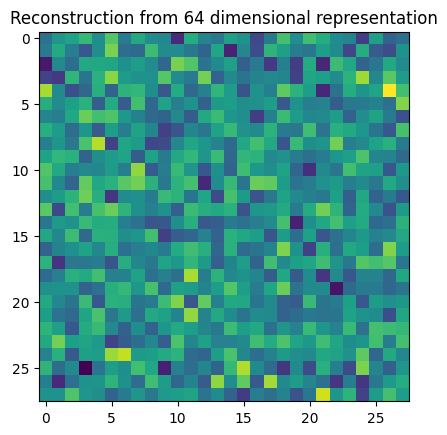

Epoch 3, Iteration 127 -- Loss: 0.249463
Epoch 3, Iteration 128 -- Loss: 0.249433
Epoch 3, Iteration 129 -- Loss: 0.249443
Epoch 3, Iteration 130 -- Loss: 0.249489
Epoch 3, Iteration 131 -- Loss: 0.249473
Epoch 3, Iteration 132 -- Loss: 0.249475
Epoch 3, Iteration 133 -- Loss: 0.249496
Epoch 3, Iteration 134 -- Loss: 0.249465
Epoch 3, Iteration 135 -- Loss: 0.249428
Epoch 3, Iteration 136 -- Loss: 0.249454


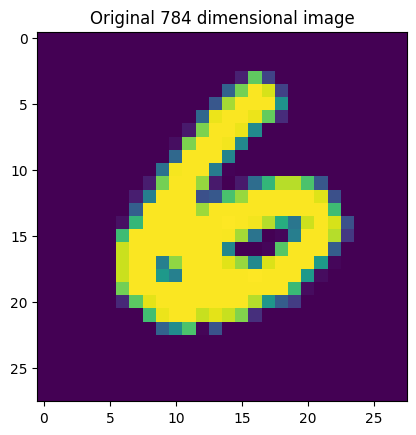

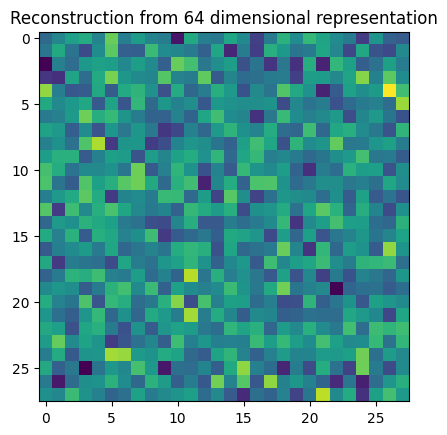

Epoch 3, Iteration 137 -- Loss: 0.249450
Epoch 3, Iteration 138 -- Loss: 0.249416
Epoch 3, Iteration 139 -- Loss: 0.249463
Epoch 3, Iteration 140 -- Loss: 0.249444
Epoch 3, Iteration 141 -- Loss: 0.249490
Epoch 3, Iteration 142 -- Loss: 0.249447
Epoch 3, Iteration 143 -- Loss: 0.249424
Epoch 3, Iteration 144 -- Loss: 0.249439
Epoch 3, Iteration 145 -- Loss: 0.249489
Epoch 3, Iteration 146 -- Loss: 0.249493


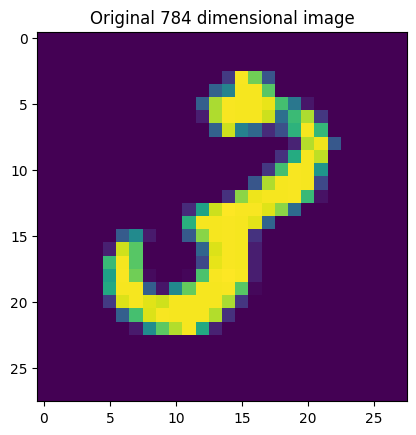

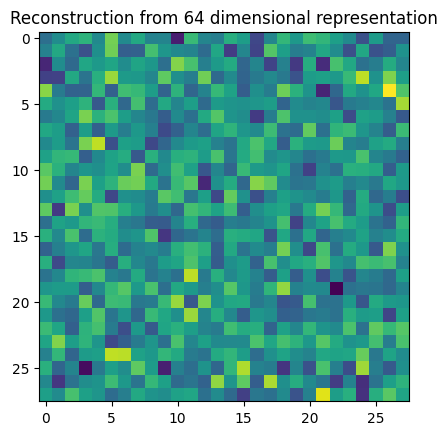

Epoch 3, Iteration 147 -- Loss: 0.249445
Epoch 3, Iteration 148 -- Loss: 0.249456
Epoch 3, Iteration 149 -- Loss: 0.249441
Epoch 3, Iteration 150 -- Loss: 0.249445
Epoch 3, Iteration 151 -- Loss: 0.249413
Epoch 3, Iteration 152 -- Loss: 0.249423
Epoch 3, Iteration 153 -- Loss: 0.249445
Epoch 3, Iteration 154 -- Loss: 0.249432
Epoch 3, Iteration 155 -- Loss: 0.249436
Epoch 3, Iteration 156 -- Loss: 0.249457


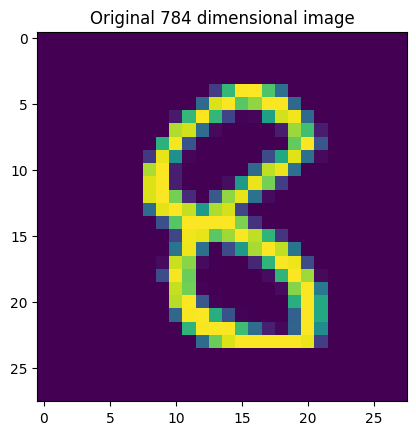

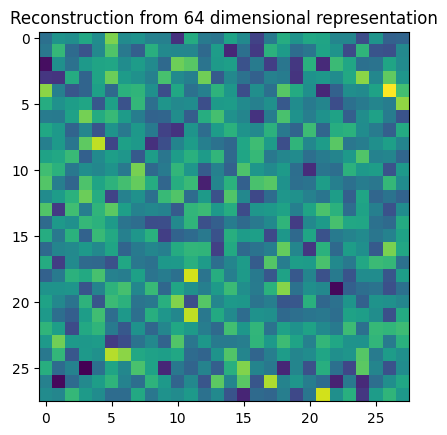

Epoch 3, Iteration 157 -- Loss: 0.249412
Epoch 3, Iteration 158 -- Loss: 0.249443
Epoch 3, Iteration 159 -- Loss: 0.249444
Epoch 3, Iteration 160 -- Loss: 0.249453
Epoch 3, Iteration 161 -- Loss: 0.249427
Epoch 3, Iteration 162 -- Loss: 0.249402
Epoch 3, Iteration 163 -- Loss: 0.249394
Epoch 3, Iteration 164 -- Loss: 0.249431
Epoch 3, Iteration 165 -- Loss: 0.249420
Epoch 3, Iteration 166 -- Loss: 0.249423


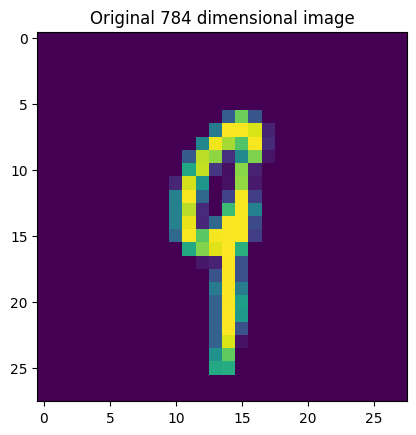

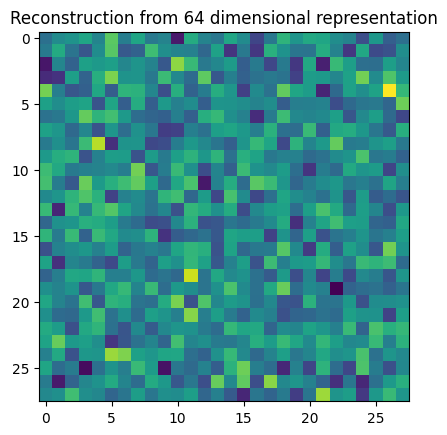

Epoch 3, Iteration 167 -- Loss: 0.249413
Epoch 3, Iteration 168 -- Loss: 0.249435
Epoch 3, Iteration 169 -- Loss: 0.249391
Epoch 3, Iteration 170 -- Loss: 0.249381
Epoch 3, Iteration 171 -- Loss: 0.249421
Epoch 3, Iteration 172 -- Loss: 0.249426
Epoch 3, Iteration 173 -- Loss: 0.249397
Epoch 4, Iteration 174 -- Loss: 0.249400


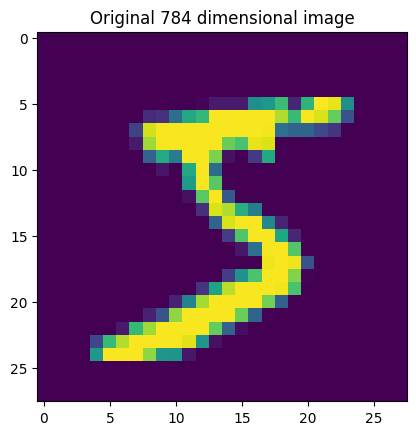

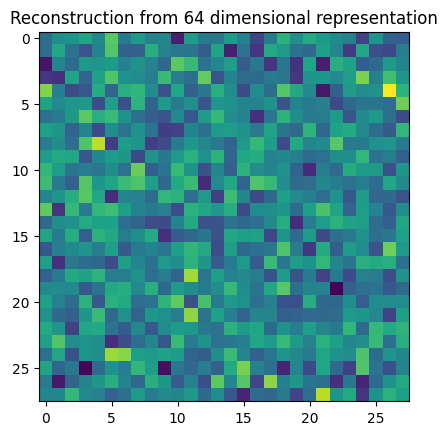

Epoch 4, Iteration 175 -- Loss: 0.249370
Epoch 4, Iteration 176 -- Loss: 0.249377
Epoch 4, Iteration 177 -- Loss: 0.249398
Epoch 4, Iteration 178 -- Loss: 0.249363
Epoch 4, Iteration 179 -- Loss: 0.249320
Epoch 4, Iteration 180 -- Loss: 0.249370
Epoch 4, Iteration 181 -- Loss: 0.249390
Epoch 4, Iteration 182 -- Loss: 0.249335
Epoch 4, Iteration 183 -- Loss: 0.249347
Epoch 4, Iteration 184 -- Loss: 0.249303


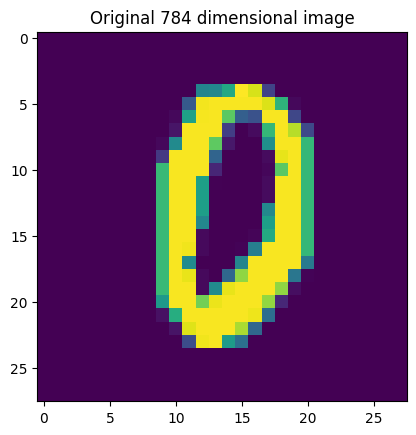

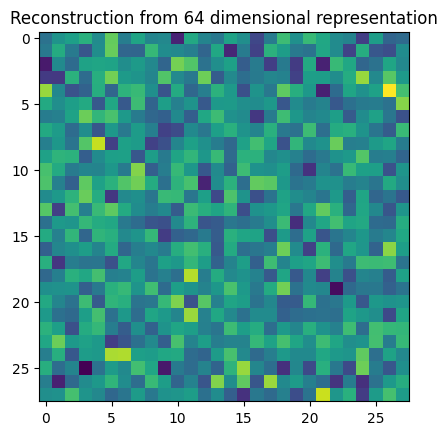

Epoch 4, Iteration 185 -- Loss: 0.249335
Epoch 4, Iteration 186 -- Loss: 0.249297
Epoch 4, Iteration 187 -- Loss: 0.249305
Epoch 4, Iteration 188 -- Loss: 0.249357
Epoch 4, Iteration 189 -- Loss: 0.249330
Epoch 4, Iteration 190 -- Loss: 0.249330
Epoch 4, Iteration 191 -- Loss: 0.249349
Epoch 4, Iteration 192 -- Loss: 0.249308
Epoch 4, Iteration 193 -- Loss: 0.249257
Epoch 4, Iteration 194 -- Loss: 0.249284


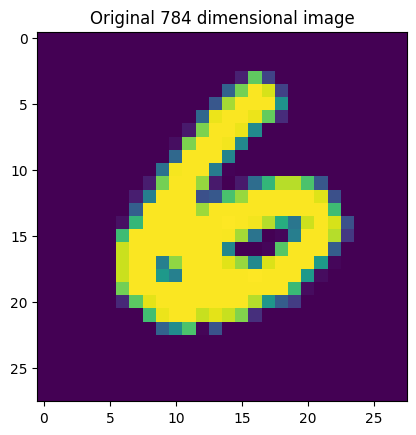

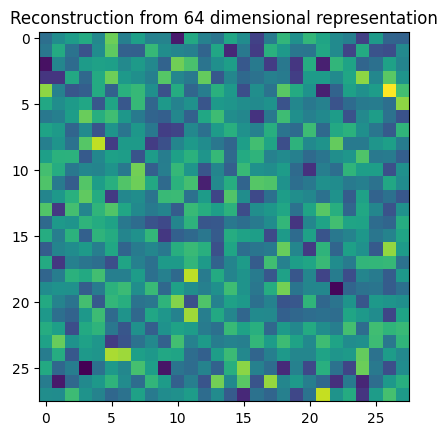

Epoch 4, Iteration 195 -- Loss: 0.249274
Epoch 4, Iteration 196 -- Loss: 0.249221
Epoch 4, Iteration 197 -- Loss: 0.249277
Epoch 4, Iteration 198 -- Loss: 0.249243
Epoch 4, Iteration 199 -- Loss: 0.249302
Epoch 4, Iteration 200 -- Loss: 0.249240
Epoch 4, Iteration 201 -- Loss: 0.249199
Epoch 4, Iteration 202 -- Loss: 0.249212
Epoch 4, Iteration 203 -- Loss: 0.249276
Epoch 4, Iteration 204 -- Loss: 0.249277


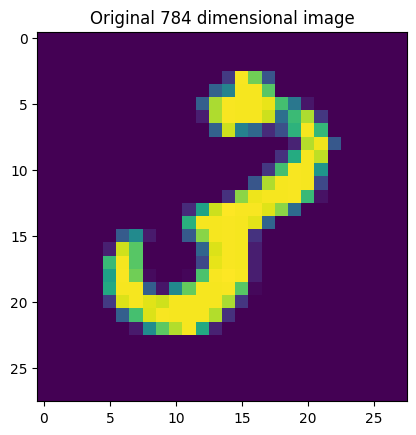

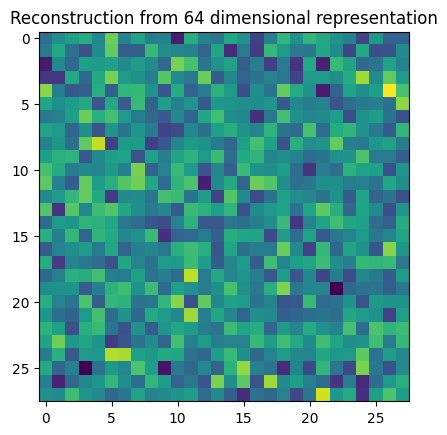

Epoch 4, Iteration 205 -- Loss: 0.249201
Epoch 4, Iteration 206 -- Loss: 0.249210
Epoch 4, Iteration 207 -- Loss: 0.249178
Epoch 4, Iteration 208 -- Loss: 0.249177
Epoch 4, Iteration 209 -- Loss: 0.249124
Epoch 4, Iteration 210 -- Loss: 0.249127
Epoch 4, Iteration 211 -- Loss: 0.249153
Epoch 4, Iteration 212 -- Loss: 0.249121
Epoch 4, Iteration 213 -- Loss: 0.249121
Epoch 4, Iteration 214 -- Loss: 0.249146


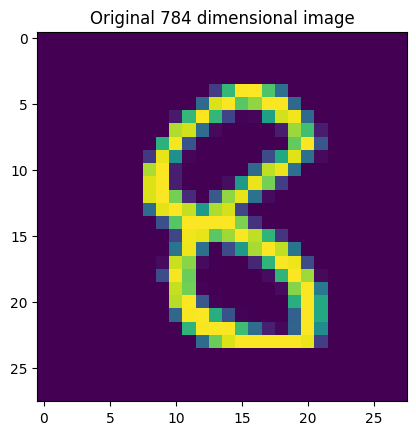

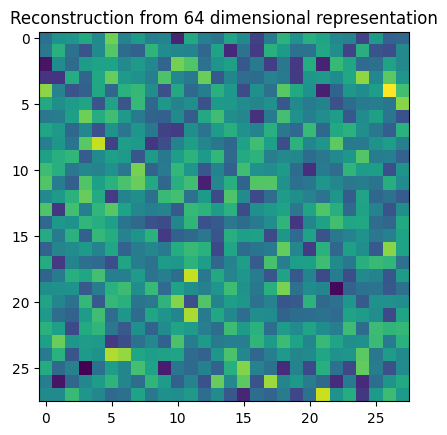

Epoch 4, Iteration 215 -- Loss: 0.249063
Epoch 4, Iteration 216 -- Loss: 0.249097
Epoch 4, Iteration 217 -- Loss: 0.249096
Epoch 4, Iteration 218 -- Loss: 0.249103
Epoch 4, Iteration 219 -- Loss: 0.249046
Epoch 4, Iteration 220 -- Loss: 0.248992
Epoch 4, Iteration 221 -- Loss: 0.248967
Epoch 4, Iteration 222 -- Loss: 0.249019
Epoch 4, Iteration 223 -- Loss: 0.248982
Epoch 4, Iteration 224 -- Loss: 0.248984


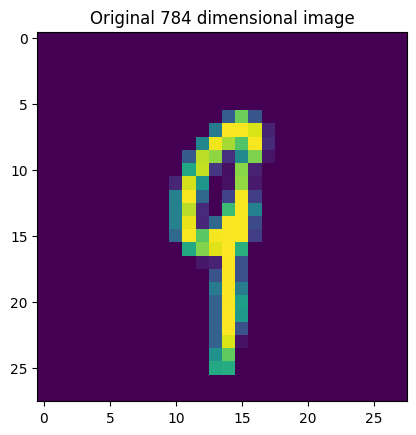

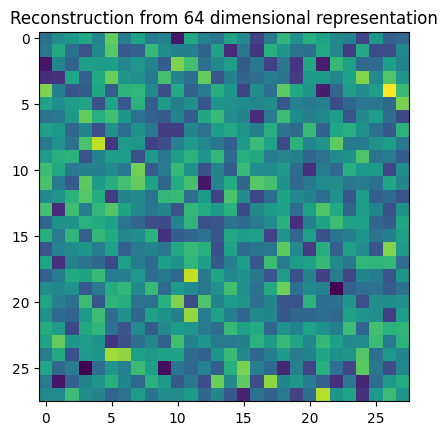

Epoch 4, Iteration 225 -- Loss: 0.248943
Epoch 4, Iteration 226 -- Loss: 0.248977
Epoch 4, Iteration 227 -- Loss: 0.248877
Epoch 4, Iteration 228 -- Loss: 0.248843
Epoch 4, Iteration 229 -- Loss: 0.248910
Epoch 4, Iteration 230 -- Loss: 0.248908
Epoch 4, Iteration 231 -- Loss: 0.248834
Epoch 5, Iteration 232 -- Loss: 0.248824


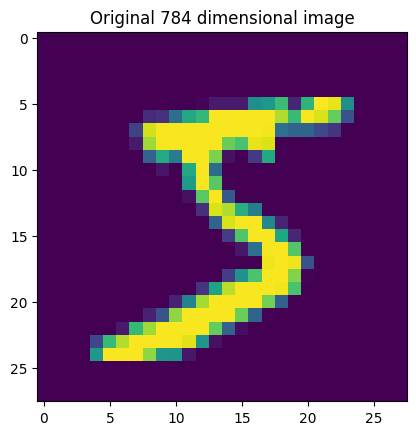

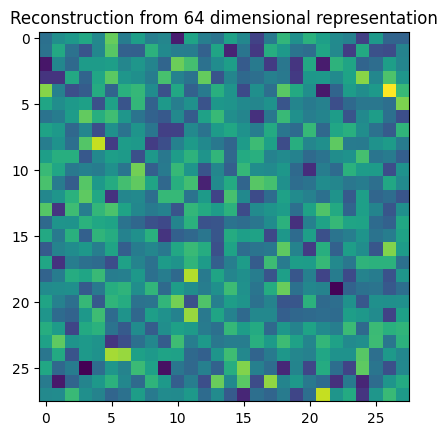

Epoch 5, Iteration 233 -- Loss: 0.248744
Epoch 5, Iteration 234 -- Loss: 0.248747
Epoch 5, Iteration 235 -- Loss: 0.248770
Epoch 5, Iteration 236 -- Loss: 0.248691
Epoch 5, Iteration 237 -- Loss: 0.248574
Epoch 5, Iteration 238 -- Loss: 0.248649
Epoch 5, Iteration 239 -- Loss: 0.248681
Epoch 5, Iteration 240 -- Loss: 0.248540
Epoch 5, Iteration 241 -- Loss: 0.248555
Epoch 5, Iteration 242 -- Loss: 0.248425


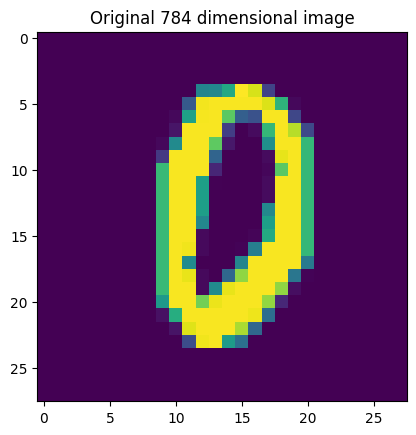

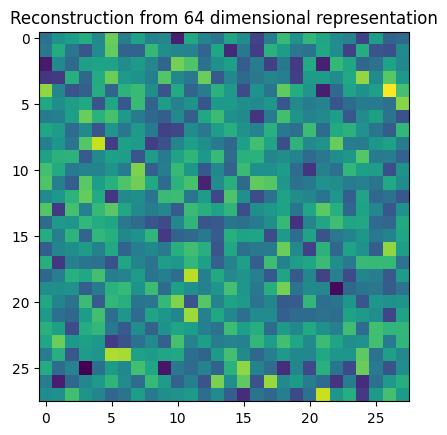

Epoch 5, Iteration 243 -- Loss: 0.248466
Epoch 5, Iteration 244 -- Loss: 0.248379
Epoch 5, Iteration 245 -- Loss: 0.248372
Epoch 5, Iteration 246 -- Loss: 0.248467
Epoch 5, Iteration 247 -- Loss: 0.248371
Epoch 5, Iteration 248 -- Loss: 0.248351
Epoch 5, Iteration 249 -- Loss: 0.248362
Epoch 5, Iteration 250 -- Loss: 0.248249
Epoch 5, Iteration 251 -- Loss: 0.248105
Epoch 5, Iteration 252 -- Loss: 0.248135


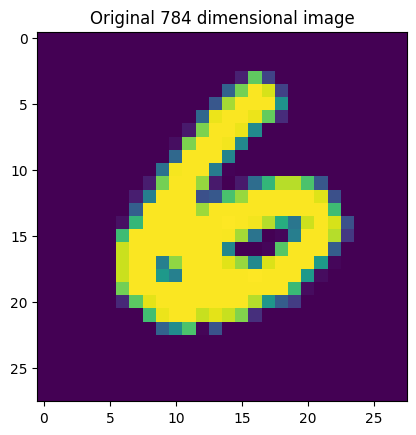

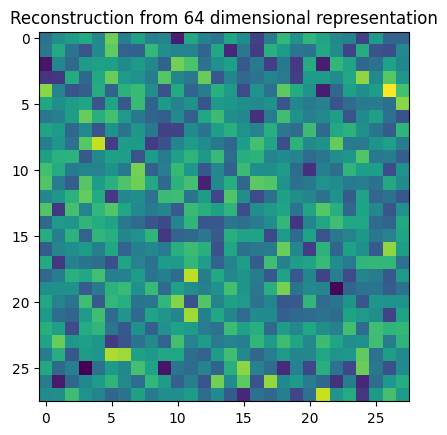

Epoch 5, Iteration 253 -- Loss: 0.248086
Epoch 5, Iteration 254 -- Loss: 0.247910
Epoch 5, Iteration 255 -- Loss: 0.248026
Epoch 5, Iteration 256 -- Loss: 0.247894
Epoch 5, Iteration 257 -- Loss: 0.248031
Epoch 5, Iteration 258 -- Loss: 0.247843
Epoch 5, Iteration 259 -- Loss: 0.247685
Epoch 5, Iteration 260 -- Loss: 0.247690
Epoch 5, Iteration 261 -- Loss: 0.247846
Epoch 5, Iteration 262 -- Loss: 0.247817


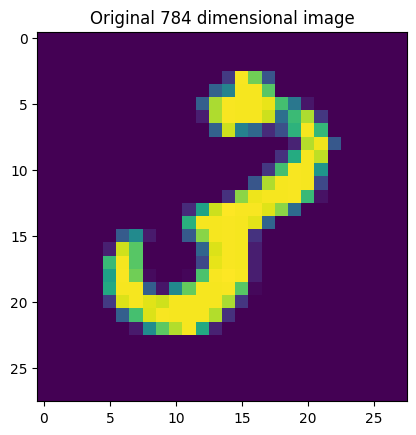

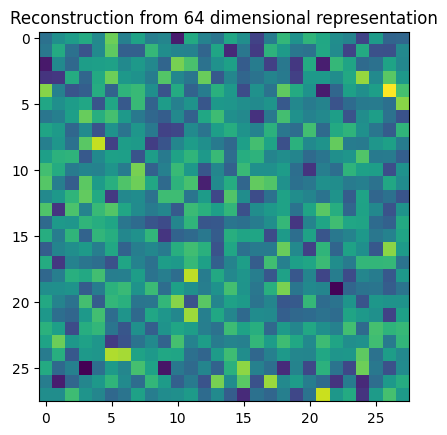

Epoch 5, Iteration 263 -- Loss: 0.247560
Epoch 5, Iteration 264 -- Loss: 0.247551
Epoch 5, Iteration 265 -- Loss: 0.247409
Epoch 5, Iteration 266 -- Loss: 0.247374
Epoch 5, Iteration 267 -- Loss: 0.247182
Epoch 5, Iteration 268 -- Loss: 0.247139
Epoch 5, Iteration 269 -- Loss: 0.247189
Epoch 5, Iteration 270 -- Loss: 0.247032
Epoch 5, Iteration 271 -- Loss: 0.247009
Epoch 5, Iteration 272 -- Loss: 0.247057


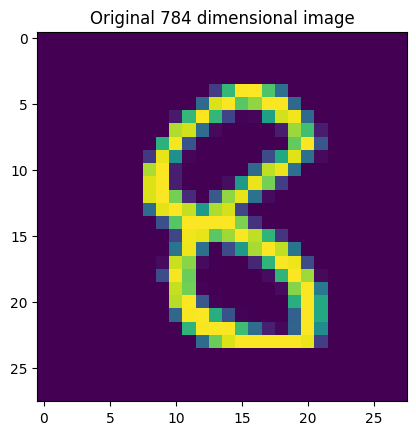

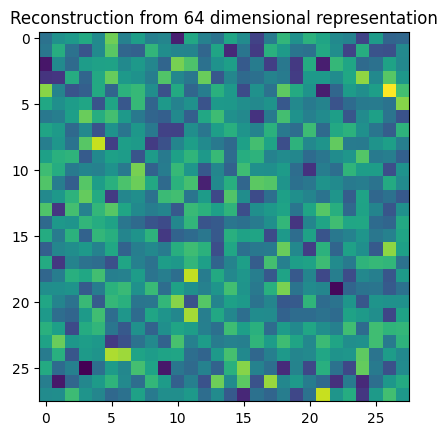

Epoch 5, Iteration 273 -- Loss: 0.246721
Epoch 5, Iteration 274 -- Loss: 0.246774
Epoch 5, Iteration 275 -- Loss: 0.246759
Epoch 5, Iteration 276 -- Loss: 0.246754
Epoch 5, Iteration 277 -- Loss: 0.246498
Epoch 5, Iteration 278 -- Loss: 0.246246
Epoch 5, Iteration 279 -- Loss: 0.246109
Epoch 5, Iteration 280 -- Loss: 0.246265
Epoch 5, Iteration 281 -- Loss: 0.246052
Epoch 5, Iteration 282 -- Loss: 0.246047


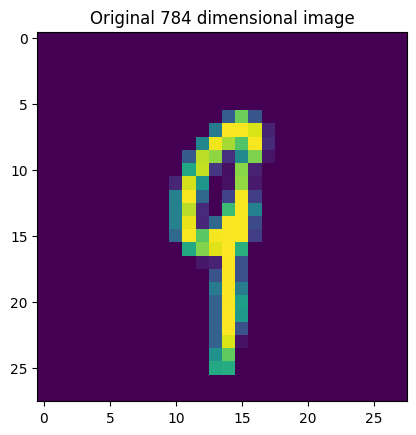

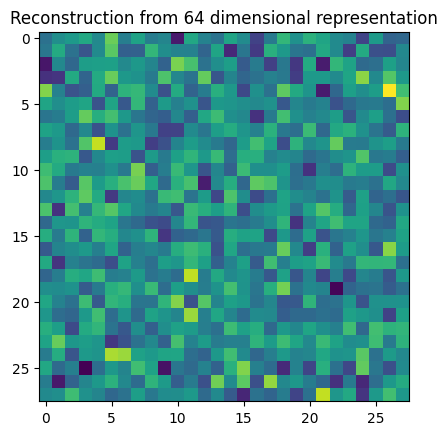

Epoch 5, Iteration 283 -- Loss: 0.245795
Epoch 5, Iteration 284 -- Loss: 0.245912
Epoch 5, Iteration 285 -- Loss: 0.245441
Epoch 5, Iteration 286 -- Loss: 0.245250
Epoch 5, Iteration 287 -- Loss: 0.245498
Epoch 5, Iteration 288 -- Loss: 0.245450
Epoch 5, Iteration 289 -- Loss: 0.245079
Epoch 6, Iteration 290 -- Loss: 0.244978


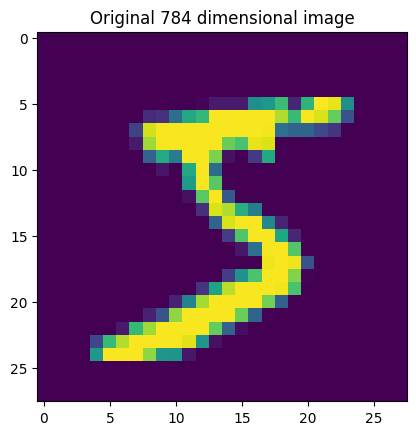

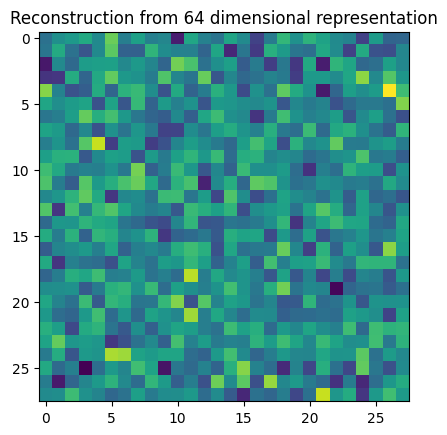

Epoch 6, Iteration 291 -- Loss: 0.244568
Epoch 6, Iteration 292 -- Loss: 0.244551
Epoch 6, Iteration 293 -- Loss: 0.244590
Epoch 6, Iteration 294 -- Loss: 0.244216
Epoch 6, Iteration 295 -- Loss: 0.243607
Epoch 6, Iteration 296 -- Loss: 0.243855
Epoch 6, Iteration 297 -- Loss: 0.243973
Epoch 6, Iteration 298 -- Loss: 0.243268
Epoch 6, Iteration 299 -- Loss: 0.243299
Epoch 6, Iteration 300 -- Loss: 0.242605


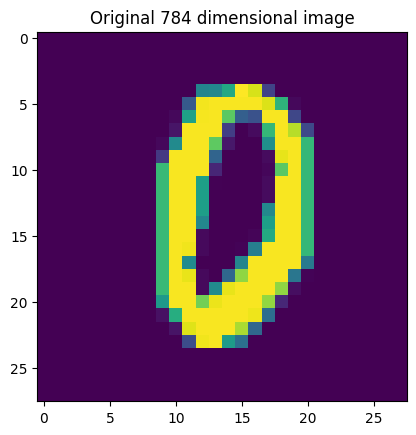

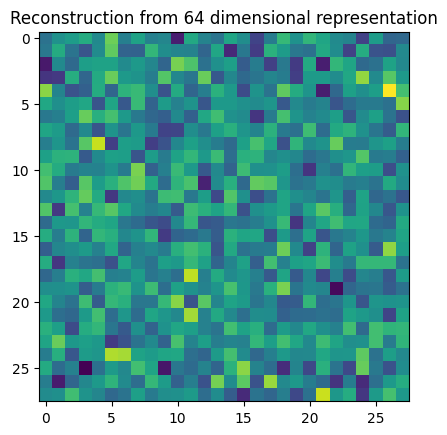

Epoch 6, Iteration 301 -- Loss: 0.242711
Epoch 6, Iteration 302 -- Loss: 0.242304
Epoch 6, Iteration 303 -- Loss: 0.242203
Epoch 6, Iteration 304 -- Loss: 0.242584
Epoch 6, Iteration 305 -- Loss: 0.242032
Epoch 6, Iteration 306 -- Loss: 0.241893
Epoch 6, Iteration 307 -- Loss: 0.241850
Epoch 6, Iteration 308 -- Loss: 0.241269
Epoch 6, Iteration 309 -- Loss: 0.240528
Epoch 6, Iteration 310 -- Loss: 0.240580


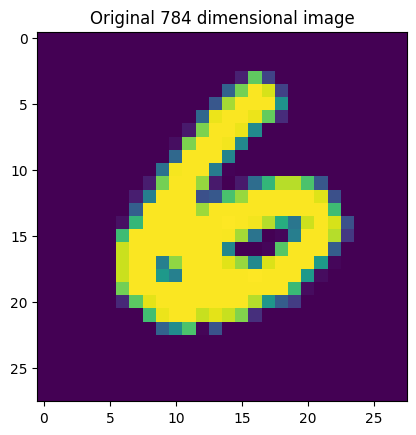

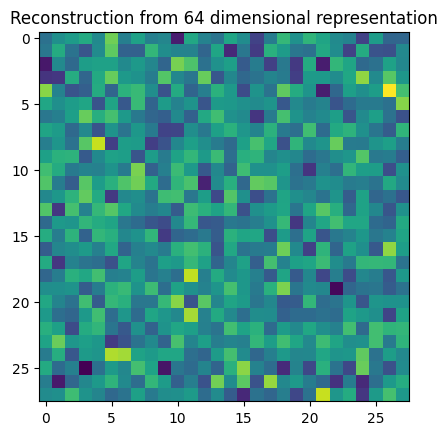

Epoch 6, Iteration 311 -- Loss: 0.240289
Epoch 6, Iteration 312 -- Loss: 0.239316
Epoch 6, Iteration 313 -- Loss: 0.239823
Epoch 6, Iteration 314 -- Loss: 0.239068
Epoch 6, Iteration 315 -- Loss: 0.239716
Epoch 6, Iteration 316 -- Loss: 0.238721
Epoch 6, Iteration 317 -- Loss: 0.237817
Epoch 6, Iteration 318 -- Loss: 0.237770
Epoch 6, Iteration 319 -- Loss: 0.238524
Epoch 6, Iteration 320 -- Loss: 0.238320


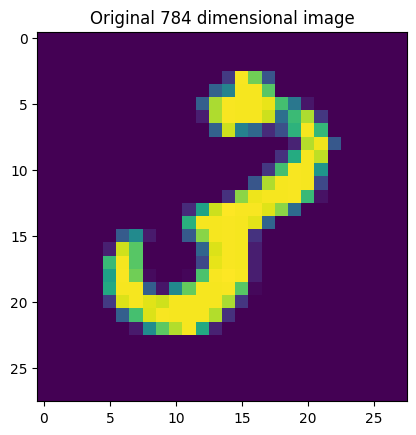

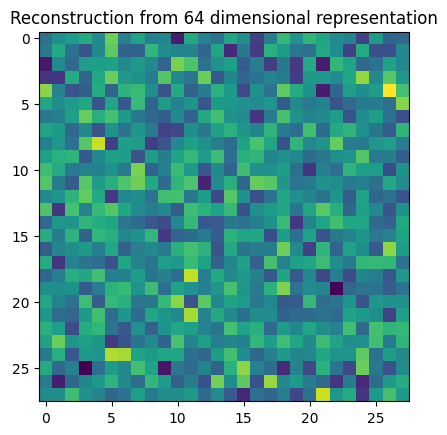

Epoch 6, Iteration 321 -- Loss: 0.236903
Epoch 6, Iteration 322 -- Loss: 0.236794
Epoch 6, Iteration 323 -- Loss: 0.235954
Epoch 6, Iteration 324 -- Loss: 0.235715
Epoch 6, Iteration 325 -- Loss: 0.234660
Epoch 6, Iteration 326 -- Loss: 0.234339
Epoch 6, Iteration 327 -- Loss: 0.234543
Epoch 6, Iteration 328 -- Loss: 0.233624
Epoch 6, Iteration 329 -- Loss: 0.233461
Epoch 6, Iteration 330 -- Loss: 0.233677


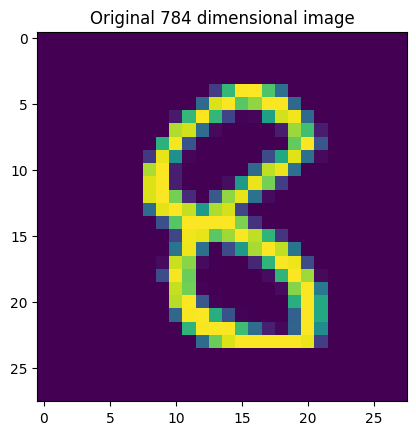

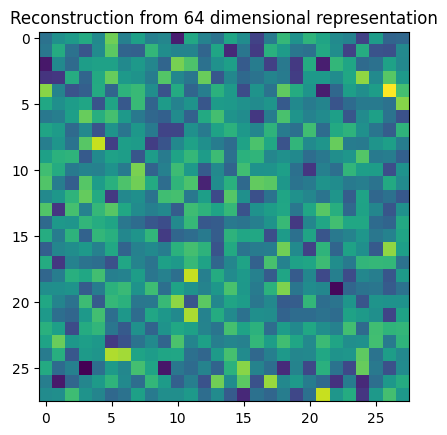

Epoch 6, Iteration 331 -- Loss: 0.231765
Epoch 6, Iteration 332 -- Loss: 0.231956
Epoch 6, Iteration 333 -- Loss: 0.231871
Epoch 6, Iteration 334 -- Loss: 0.231811
Epoch 6, Iteration 335 -- Loss: 0.230336
Epoch 6, Iteration 336 -- Loss: 0.228887
Epoch 6, Iteration 337 -- Loss: 0.228093
Epoch 6, Iteration 338 -- Loss: 0.228902
Epoch 6, Iteration 339 -- Loss: 0.227643
Epoch 6, Iteration 340 -- Loss: 0.227620


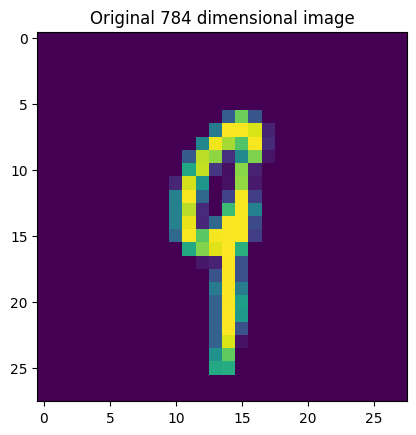

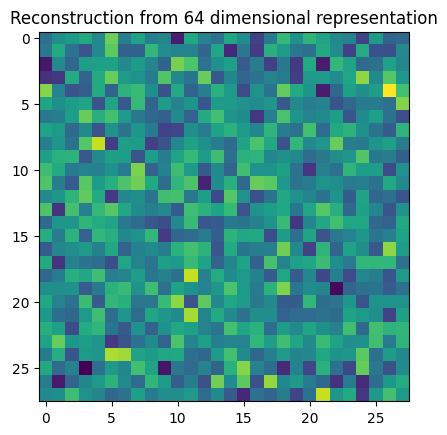

Epoch 6, Iteration 341 -- Loss: 0.226114
Epoch 6, Iteration 342 -- Loss: 0.226769
Epoch 6, Iteration 343 -- Loss: 0.224091
Epoch 6, Iteration 344 -- Loss: 0.223001
Epoch 6, Iteration 345 -- Loss: 0.224379
Epoch 6, Iteration 346 -- Loss: 0.224076
Epoch 6, Iteration 347 -- Loss: 0.221965
Epoch 7, Iteration 348 -- Loss: 0.221384


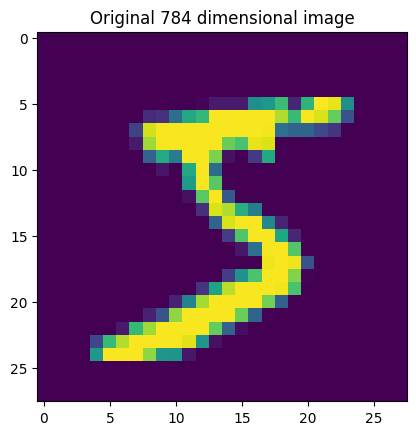

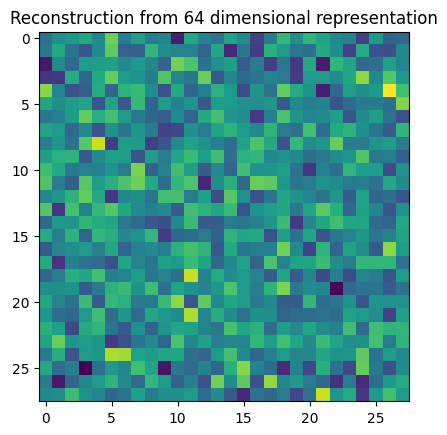

Epoch 7, Iteration 349 -- Loss: 0.219118
Epoch 7, Iteration 350 -- Loss: 0.219004
Epoch 7, Iteration 351 -- Loss: 0.219194
Epoch 7, Iteration 352 -- Loss: 0.217176
Epoch 7, Iteration 353 -- Loss: 0.213814
Epoch 7, Iteration 354 -- Loss: 0.215133
Epoch 7, Iteration 355 -- Loss: 0.215818
Epoch 7, Iteration 356 -- Loss: 0.211986
Epoch 7, Iteration 357 -- Loss: 0.212199
Epoch 7, Iteration 358 -- Loss: 0.208453


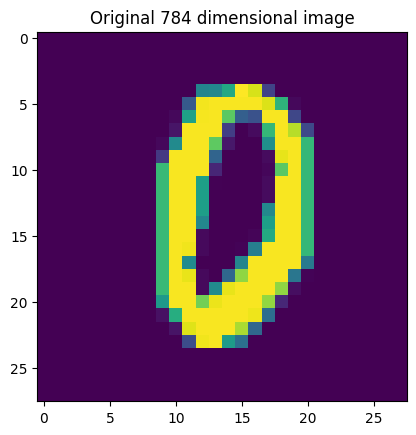

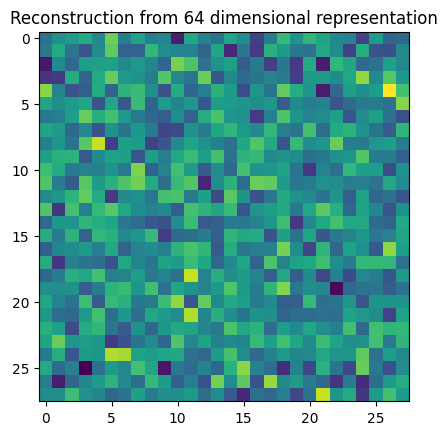

Epoch 7, Iteration 359 -- Loss: 0.209007
Epoch 7, Iteration 360 -- Loss: 0.206977
Epoch 7, Iteration 361 -- Loss: 0.206497
Epoch 7, Iteration 362 -- Loss: 0.208518
Epoch 7, Iteration 363 -- Loss: 0.205602
Epoch 7, Iteration 364 -- Loss: 0.204925
Epoch 7, Iteration 365 -- Loss: 0.204727
Epoch 7, Iteration 366 -- Loss: 0.201796
Epoch 7, Iteration 367 -- Loss: 0.198086
Epoch 7, Iteration 368 -- Loss: 0.198410


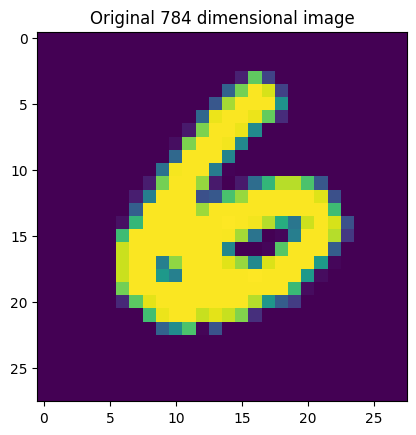

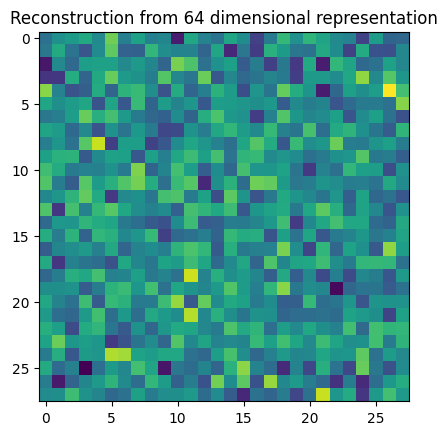

Epoch 7, Iteration 369 -- Loss: 0.197095
Epoch 7, Iteration 370 -- Loss: 0.192264
Epoch 7, Iteration 371 -- Loss: 0.194905
Epoch 7, Iteration 372 -- Loss: 0.191316
Epoch 7, Iteration 373 -- Loss: 0.194686
Epoch 7, Iteration 374 -- Loss: 0.189879
Epoch 7, Iteration 375 -- Loss: 0.185702
Epoch 7, Iteration 376 -- Loss: 0.185682
Epoch 7, Iteration 377 -- Loss: 0.189494
Epoch 7, Iteration 378 -- Loss: 0.188683


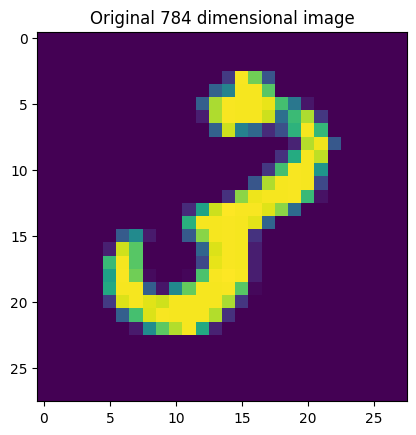

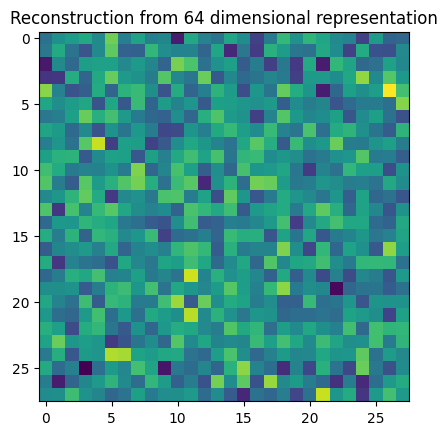

Epoch 7, Iteration 379 -- Loss: 0.182071
Epoch 7, Iteration 380 -- Loss: 0.181790
Epoch 7, Iteration 381 -- Loss: 0.178075
Epoch 7, Iteration 382 -- Loss: 0.177271
Epoch 7, Iteration 383 -- Loss: 0.173031
Epoch 7, Iteration 384 -- Loss: 0.171793
Epoch 7, Iteration 385 -- Loss: 0.172930
Epoch 7, Iteration 386 -- Loss: 0.169353
Epoch 7, Iteration 387 -- Loss: 0.168888
Epoch 7, Iteration 388 -- Loss: 0.170378


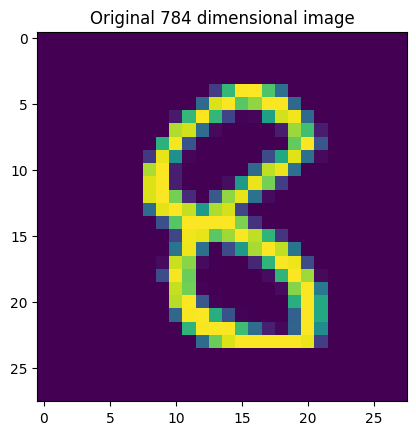

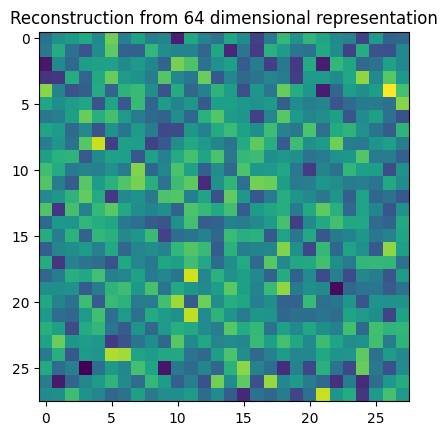

Epoch 7, Iteration 389 -- Loss: 0.162546
Epoch 7, Iteration 390 -- Loss: 0.163546
Epoch 7, Iteration 391 -- Loss: 0.163640
Epoch 7, Iteration 392 -- Loss: 0.163933
Epoch 7, Iteration 393 -- Loss: 0.158224
Epoch 7, Iteration 394 -- Loss: 0.153138
Epoch 7, Iteration 395 -- Loss: 0.150619
Epoch 7, Iteration 396 -- Loss: 0.154148
Epoch 7, Iteration 397 -- Loss: 0.149850
Epoch 7, Iteration 398 -- Loss: 0.150450


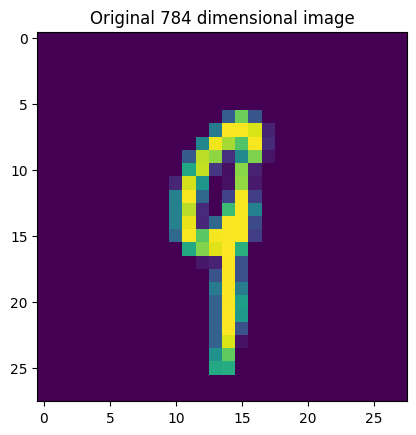

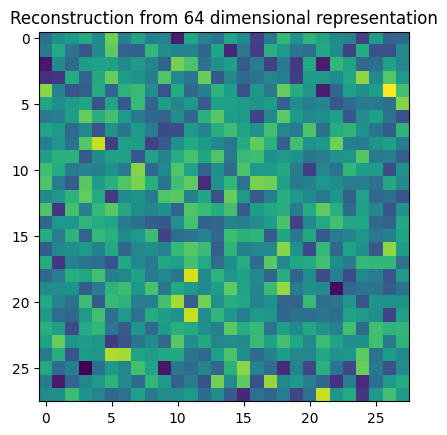

Epoch 7, Iteration 399 -- Loss: 0.145357
Epoch 7, Iteration 400 -- Loss: 0.148348
Epoch 7, Iteration 401 -- Loss: 0.139450
Epoch 7, Iteration 402 -- Loss: 0.136483
Epoch 7, Iteration 403 -- Loss: 0.142021
Epoch 7, Iteration 404 -- Loss: 0.141463
Epoch 7, Iteration 405 -- Loss: 0.134752
Epoch 8, Iteration 406 -- Loss: 0.133820


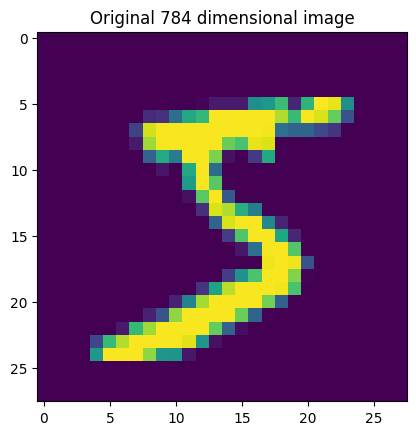

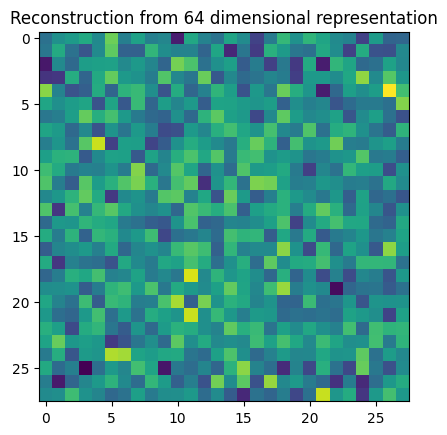

Epoch 8, Iteration 407 -- Loss: 0.128022
Epoch 8, Iteration 408 -- Loss: 0.127826
Epoch 8, Iteration 409 -- Loss: 0.129311
Epoch 8, Iteration 410 -- Loss: 0.124148
Epoch 8, Iteration 411 -- Loss: 0.115598
Epoch 8, Iteration 412 -- Loss: 0.120421
Epoch 8, Iteration 413 -- Loss: 0.123457
Epoch 8, Iteration 414 -- Loss: 0.113649
Epoch 8, Iteration 415 -- Loss: 0.115201
Epoch 8, Iteration 416 -- Loss: 0.106634


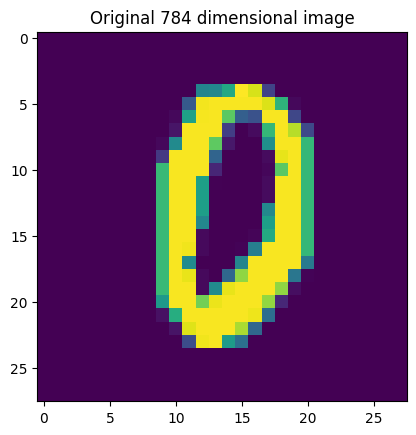

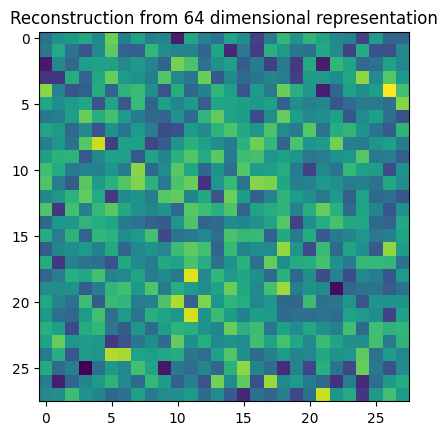

Epoch 8, Iteration 417 -- Loss: 0.108782
Epoch 8, Iteration 418 -- Loss: 0.105460
Epoch 8, Iteration 419 -- Loss: 0.105590
Epoch 8, Iteration 420 -- Loss: 0.111126
Epoch 8, Iteration 421 -- Loss: 0.105198
Epoch 8, Iteration 422 -- Loss: 0.104485
Epoch 8, Iteration 423 -- Loss: 0.105237
Epoch 8, Iteration 424 -- Loss: 0.099814
Epoch 8, Iteration 425 -- Loss: 0.093058
Epoch 8, Iteration 426 -- Loss: 0.094822


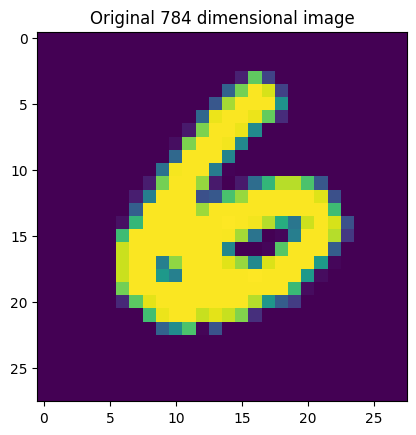

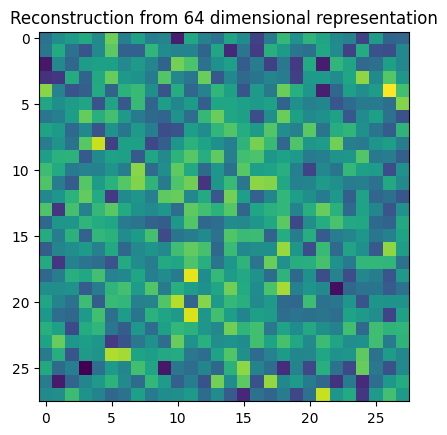

Epoch 8, Iteration 427 -- Loss: 0.093972
Epoch 8, Iteration 428 -- Loss: 0.085639
Epoch 8, Iteration 429 -- Loss: 0.091669
Epoch 8, Iteration 430 -- Loss: 0.086723
Epoch 8, Iteration 431 -- Loss: 0.094198
Epoch 8, Iteration 432 -- Loss: 0.085982
Epoch 8, Iteration 433 -- Loss: 0.080742
Epoch 8, Iteration 434 -- Loss: 0.081977
Epoch 8, Iteration 435 -- Loss: 0.089612
Epoch 8, Iteration 436 -- Loss: 0.089387


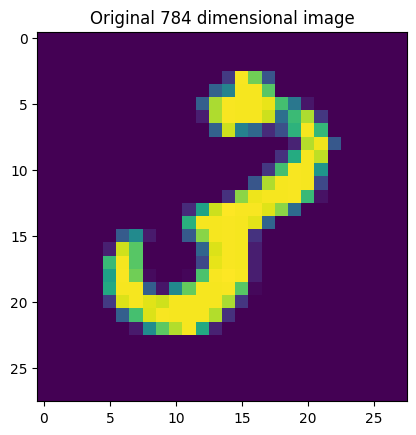

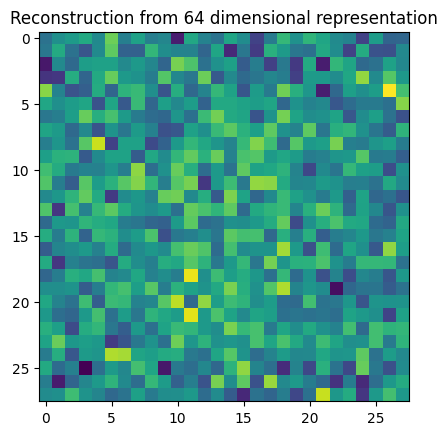

Epoch 8, Iteration 437 -- Loss: 0.079072
Epoch 8, Iteration 438 -- Loss: 0.079927
Epoch 8, Iteration 439 -- Loss: 0.075151
Epoch 8, Iteration 440 -- Loss: 0.075333
Epoch 8, Iteration 441 -- Loss: 0.071831
Epoch 8, Iteration 442 -- Loss: 0.070491
Epoch 8, Iteration 443 -- Loss: 0.072838
Epoch 8, Iteration 444 -- Loss: 0.069979
Epoch 8, Iteration 445 -- Loss: 0.069822
Epoch 8, Iteration 446 -- Loss: 0.074101


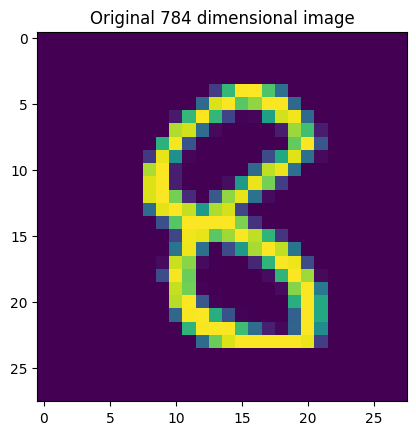

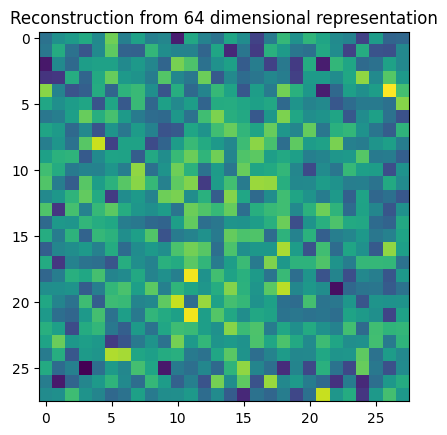

Epoch 8, Iteration 447 -- Loss: 0.064718
Epoch 8, Iteration 448 -- Loss: 0.066183
Epoch 8, Iteration 449 -- Loss: 0.067452
Epoch 8, Iteration 450 -- Loss: 0.069644
Epoch 8, Iteration 451 -- Loss: 0.063167
Epoch 8, Iteration 452 -- Loss: 0.059243
Epoch 8, Iteration 453 -- Loss: 0.057573
Epoch 8, Iteration 454 -- Loss: 0.062078
Epoch 8, Iteration 455 -- Loss: 0.058347
Epoch 8, Iteration 456 -- Loss: 0.060498


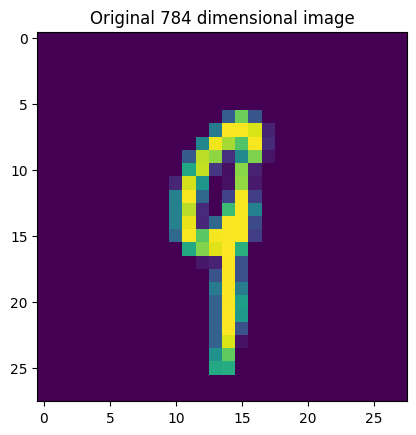

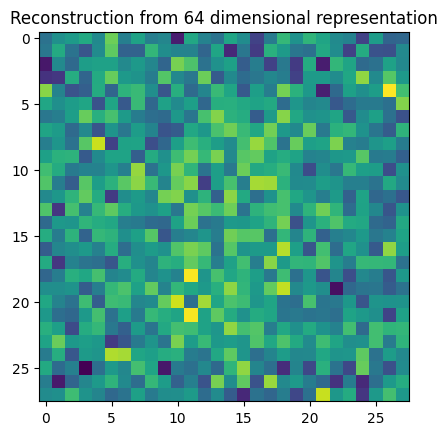

Epoch 8, Iteration 457 -- Loss: 0.055978
Epoch 8, Iteration 458 -- Loss: 0.060065
Epoch 8, Iteration 459 -- Loss: 0.052368
Epoch 8, Iteration 460 -- Loss: 0.050741
Epoch 8, Iteration 461 -- Loss: 0.057393
Epoch 8, Iteration 462 -- Loss: 0.057363
Epoch 8, Iteration 463 -- Loss: 0.050963
Epoch 9, Iteration 464 -- Loss: 0.051907


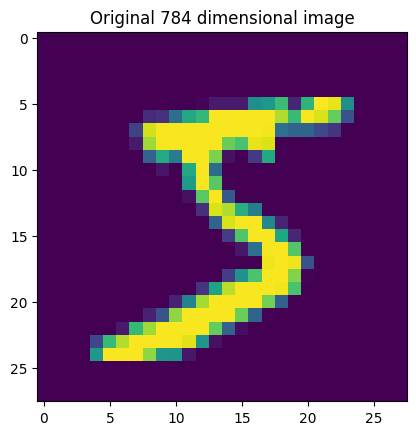

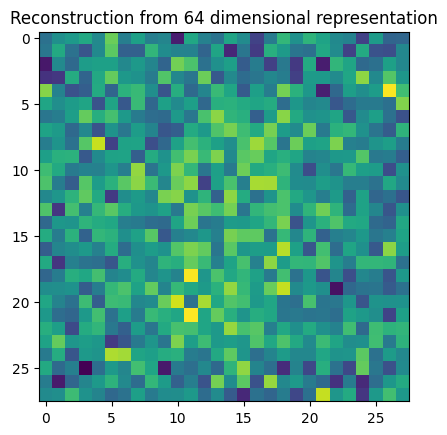

Epoch 9, Iteration 465 -- Loss: 0.048746
Epoch 9, Iteration 466 -- Loss: 0.048119
Epoch 9, Iteration 467 -- Loss: 0.050560
Epoch 9, Iteration 468 -- Loss: 0.047229
Epoch 9, Iteration 469 -- Loss: 0.041561
Epoch 9, Iteration 470 -- Loss: 0.046368
Epoch 9, Iteration 471 -- Loss: 0.050229
Epoch 9, Iteration 472 -- Loss: 0.042440
Epoch 9, Iteration 473 -- Loss: 0.044330
Epoch 9, Iteration 474 -- Loss: 0.038726


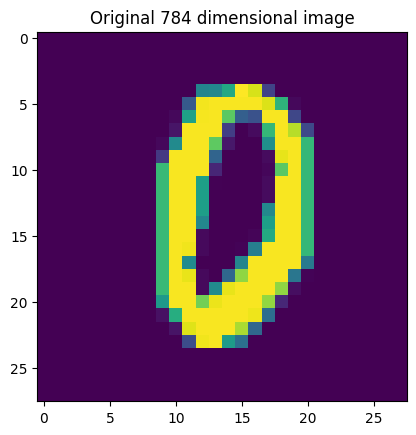

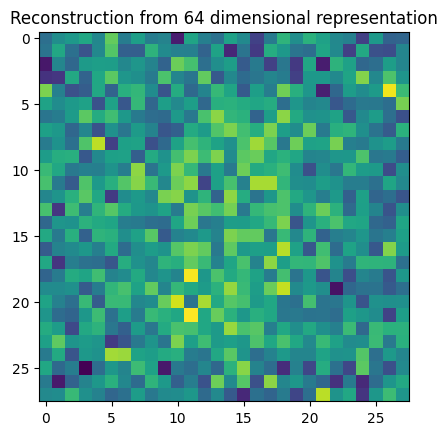

Epoch 9, Iteration 475 -- Loss: 0.040665
Epoch 9, Iteration 476 -- Loss: 0.039832
Epoch 9, Iteration 477 -- Loss: 0.040746
Epoch 9, Iteration 478 -- Loss: 0.045166
Epoch 9, Iteration 479 -- Loss: 0.041515
Epoch 9, Iteration 480 -- Loss: 0.041261
Epoch 9, Iteration 481 -- Loss: 0.042849
Epoch 9, Iteration 482 -- Loss: 0.039540
Epoch 9, Iteration 483 -- Loss: 0.035284
Epoch 9, Iteration 484 -- Loss: 0.036938


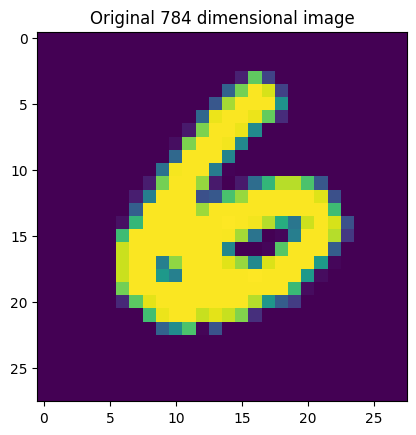

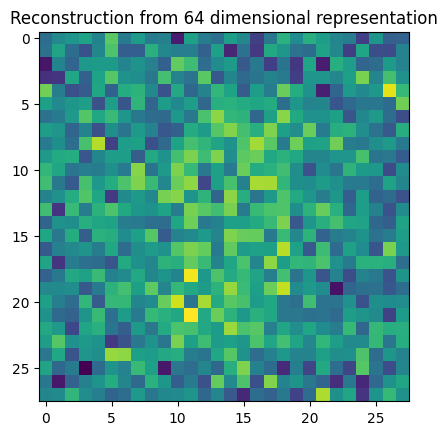

Epoch 9, Iteration 485 -- Loss: 0.037605
Epoch 9, Iteration 486 -- Loss: 0.032388
Epoch 9, Iteration 487 -- Loss: 0.036762
Epoch 9, Iteration 488 -- Loss: 0.034345
Epoch 9, Iteration 489 -- Loss: 0.040311
Epoch 9, Iteration 490 -- Loss: 0.034610
Epoch 9, Iteration 491 -- Loss: 0.032370
Epoch 9, Iteration 492 -- Loss: 0.033565
Epoch 9, Iteration 493 -- Loss: 0.039280
Epoch 9, Iteration 494 -- Loss: 0.039741


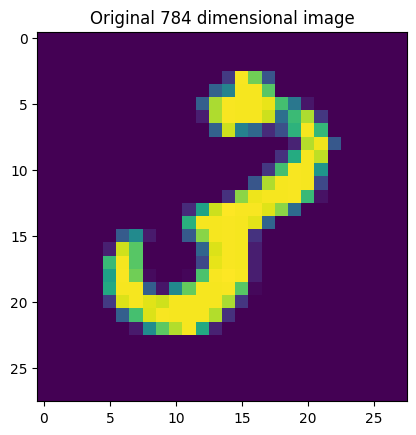

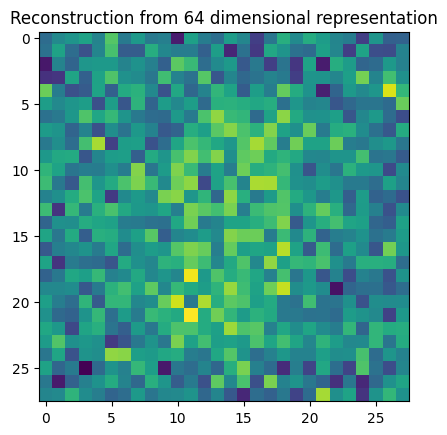

Epoch 9, Iteration 495 -- Loss: 0.032624
Epoch 9, Iteration 496 -- Loss: 0.033867
Epoch 9, Iteration 497 -- Loss: 0.030910
Epoch 9, Iteration 498 -- Loss: 0.031616
Epoch 9, Iteration 499 -- Loss: 0.030679
Epoch 9, Iteration 500 -- Loss: 0.029482
Epoch 9, Iteration 501 -- Loss: 0.031291
Epoch 9, Iteration 502 -- Loss: 0.030385
Epoch 9, Iteration 503 -- Loss: 0.030116
Epoch 9, Iteration 504 -- Loss: 0.034189


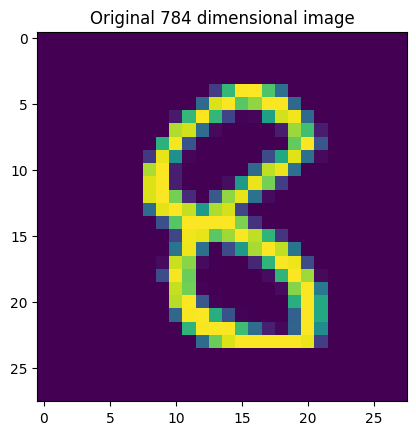

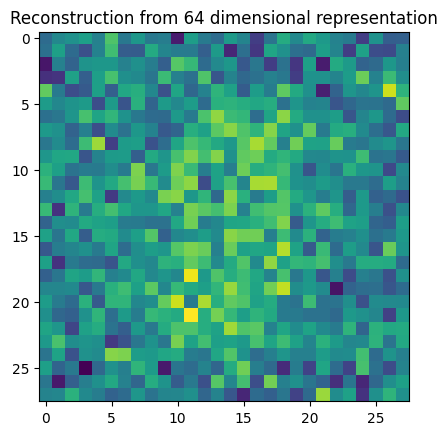

Epoch 9, Iteration 505 -- Loss: 0.028055
Epoch 9, Iteration 506 -- Loss: 0.028661
Epoch 9, Iteration 507 -- Loss: 0.029782
Epoch 9, Iteration 508 -- Loss: 0.032198
Epoch 9, Iteration 509 -- Loss: 0.027735
Epoch 9, Iteration 510 -- Loss: 0.026108
Epoch 9, Iteration 511 -- Loss: 0.025343
Epoch 9, Iteration 512 -- Loss: 0.028190
Epoch 9, Iteration 513 -- Loss: 0.025969
Epoch 9, Iteration 514 -- Loss: 0.027978


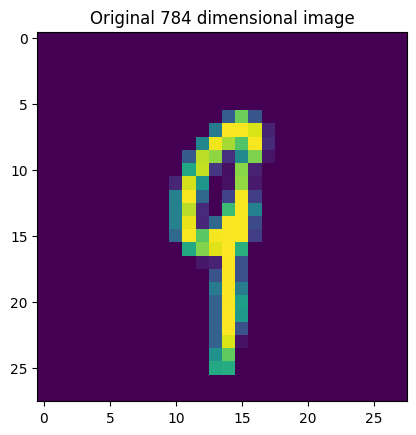

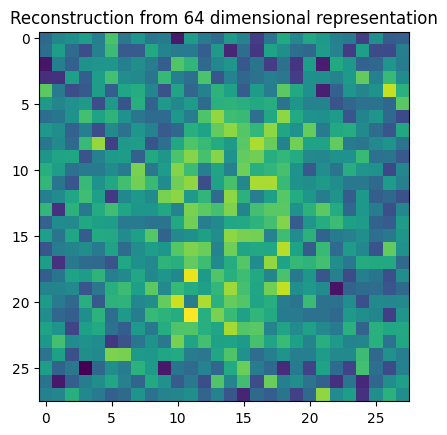

Epoch 9, Iteration 515 -- Loss: 0.025288
Epoch 9, Iteration 516 -- Loss: 0.028096
Epoch 9, Iteration 517 -- Loss: 0.023729
Epoch 9, Iteration 518 -- Loss: 0.023054
Epoch 9, Iteration 519 -- Loss: 0.027710
Epoch 9, Iteration 520 -- Loss: 0.027652
Epoch 9, Iteration 521 -- Loss: 0.023203
Epoch 10, Iteration 522 -- Loss: 0.024665


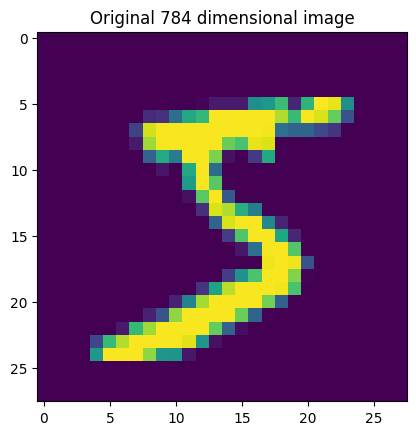

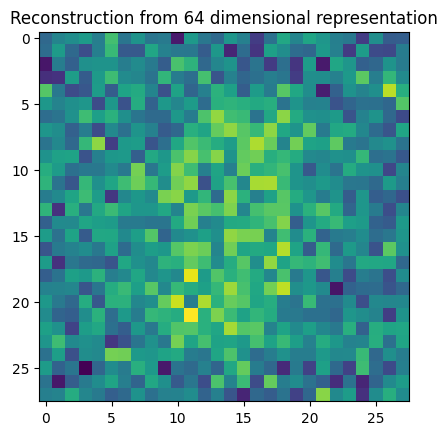

Epoch 10, Iteration 523 -- Loss: 0.023287
Epoch 10, Iteration 524 -- Loss: 0.022516
Epoch 10, Iteration 525 -- Loss: 0.024387
Epoch 10, Iteration 526 -- Loss: 0.022711
Epoch 10, Iteration 527 -- Loss: 0.019642
Epoch 10, Iteration 528 -- Loss: 0.022683
Epoch 10, Iteration 529 -- Loss: 0.025742
Epoch 10, Iteration 530 -- Loss: 0.020521
Epoch 10, Iteration 531 -- Loss: 0.021809
Epoch 10, Iteration 532 -- Loss: 0.018638


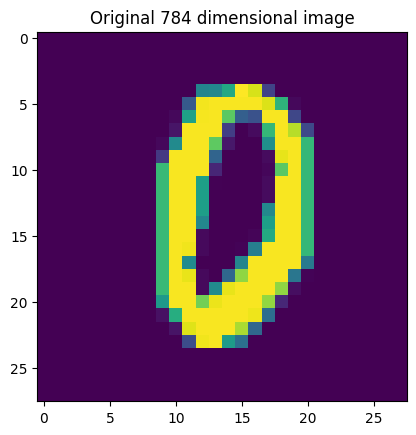

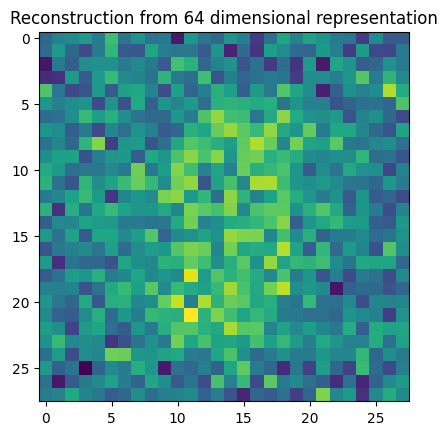

Epoch 10, Iteration 533 -- Loss: 0.019826
Epoch 10, Iteration 534 -- Loss: 0.019903
Epoch 10, Iteration 535 -- Loss: 0.020655
Epoch 10, Iteration 536 -- Loss: 0.023338
Epoch 10, Iteration 537 -- Loss: 0.021385
Epoch 10, Iteration 538 -- Loss: 0.021076
Epoch 10, Iteration 539 -- Loss: 0.022487
Epoch 10, Iteration 540 -- Loss: 0.020534
Epoch 10, Iteration 541 -- Loss: 0.017941
Epoch 10, Iteration 542 -- Loss: 0.018977


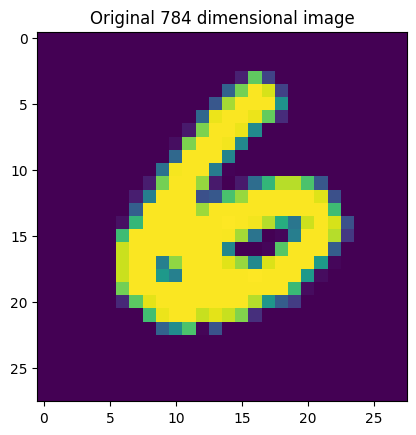

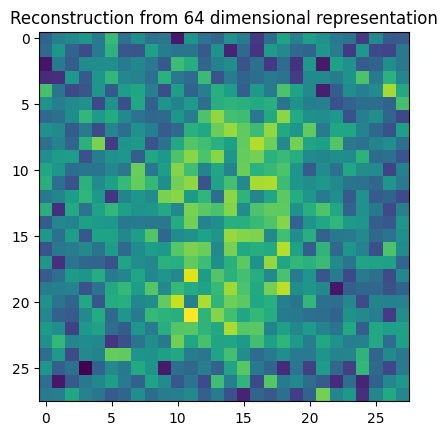

Epoch 10, Iteration 543 -- Loss: 0.019804
Epoch 10, Iteration 544 -- Loss: 0.016639
Epoch 10, Iteration 545 -- Loss: 0.019375
Epoch 10, Iteration 546 -- Loss: 0.018043
Epoch 10, Iteration 547 -- Loss: 0.022213
Epoch 10, Iteration 548 -- Loss: 0.018404
Epoch 10, Iteration 549 -- Loss: 0.017448
Epoch 10, Iteration 550 -- Loss: 0.018229
Epoch 10, Iteration 551 -- Loss: 0.022049
Epoch 10, Iteration 552 -- Loss: 0.022557


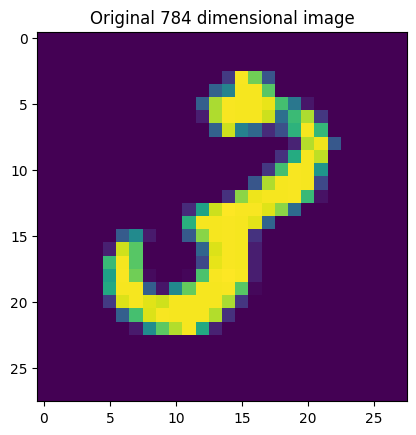

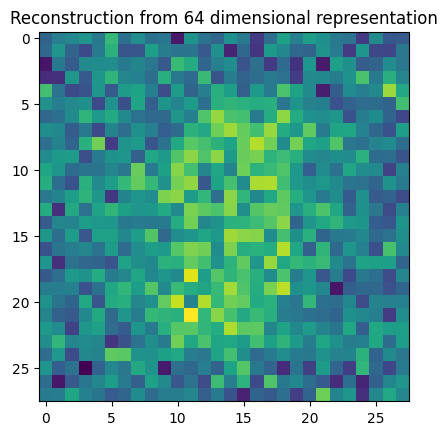

Epoch 10, Iteration 553 -- Loss: 0.017753
Epoch 10, Iteration 554 -- Loss: 0.018806
Epoch 10, Iteration 555 -- Loss: 0.016866
Epoch 10, Iteration 556 -- Loss: 0.017495
Epoch 10, Iteration 557 -- Loss: 0.017325
Epoch 10, Iteration 558 -- Loss: 0.016296
Epoch 10, Iteration 559 -- Loss: 0.017620
Epoch 10, Iteration 560 -- Loss: 0.017323
Epoch 10, Iteration 561 -- Loss: 0.016989
Epoch 10, Iteration 562 -- Loss: 0.020204


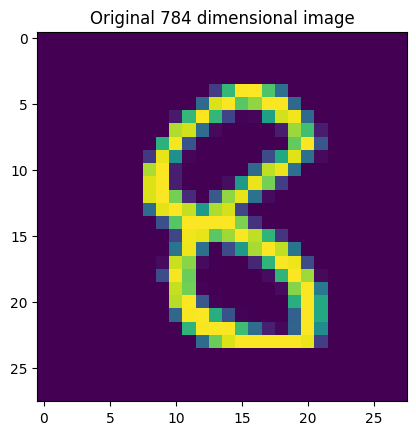

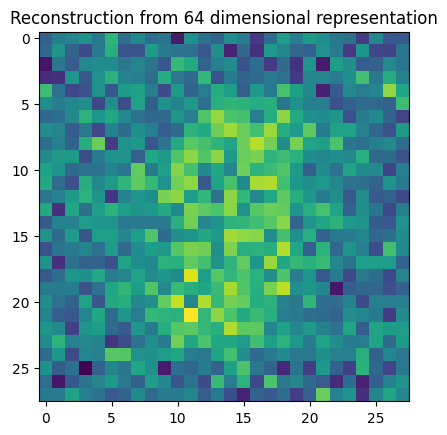

Epoch 10, Iteration 563 -- Loss: 0.016015
Epoch 10, Iteration 564 -- Loss: 0.016174
Epoch 10, Iteration 565 -- Loss: 0.016942
Epoch 10, Iteration 566 -- Loss: 0.018989
Epoch 10, Iteration 567 -- Loss: 0.015759
Epoch 10, Iteration 568 -- Loss: 0.015015
Epoch 10, Iteration 569 -- Loss: 0.014589
Epoch 10, Iteration 570 -- Loss: 0.016402
Epoch 10, Iteration 571 -- Loss: 0.014895
Epoch 10, Iteration 572 -- Loss: 0.016496


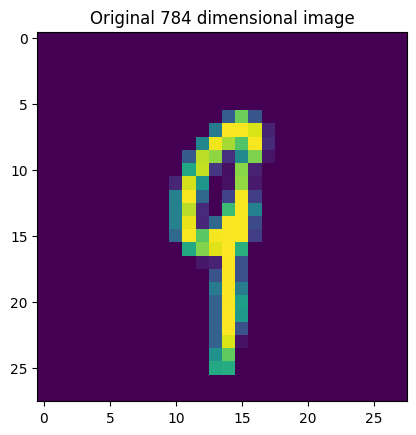

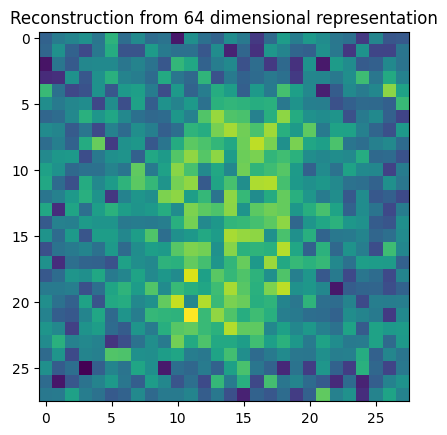

Epoch 10, Iteration 573 -- Loss: 0.014726
Epoch 10, Iteration 574 -- Loss: 0.016621
Epoch 10, Iteration 575 -- Loss: 0.013898
Epoch 10, Iteration 576 -- Loss: 0.013543
Epoch 10, Iteration 577 -- Loss: 0.016848
Epoch 10, Iteration 578 -- Loss: 0.016712
Epoch 10, Iteration 579 -- Loss: 0.013452


In [16]:
# If you are confused what h1, o1, D_w1, etc. means, 
#   refer to the notes at the top of the notebook.
# Otherwise, feel free to delete this comment.


for epoch in range(NUM_EPOCHS): 
    for n in range(ITERATIONS_PER_EPOCH):
        batch_indices = range(n * BATCH_SIZE, n * BATCH_SIZE + BATCH_SIZE)   
        X_batch = X[batch_indices]
        
        h1 = X_batch @ w1
        o1 = relu(h1)

        h2 = o1 @ w2
        o2 = sigmoid(h2)

        loss = mean_squared_error(o2, X_batch)
        print('Epoch %d, Iteration %d -- Loss: %.6f' % (epoch + 1, epoch * ITERATIONS_PER_EPOCH + n, loss))
            
        D_o2 = 2 * (o2 - X_batch)
        D_h2 = sigmoid_backward(D_o2, o2)
        D_w2 = o1.T @ D_h2

        D_o1 = D_h2 @ w2.T
        D_h1 = relu_backward(D_o1, o1)
        D_w1 = X_batch.T @ D_h1
        
        w1 -= D_w1 * LEARNING_RATE
        w2 -= D_w2 * LEARNING_RATE
        
        if n % 10 == 0:
            plt.figure()
            plt.title('Original %d dimensional image' % INPUT_SIZE)
            plt.imshow(X_batch[0].reshape(28, 28))
            plt.show()
            
            plt.figure()
            plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
            plt.imshow(o2[0].reshape(28, 28))
            plt.show()

        
    
    
